# ***Cours - Introduction à l'apprentissage Supervisé***  
« Prediction can be very difficult, especially about the future. »

La fouille de données (data mining) consiste, au sens strict, à rechercher des régularités ou des relations inconnues a priori dans de grands volumes de données. Si cette définition met plutôt en évidence un objectif descriptif, le but ultime de la fouille de données est en général d’obtenir des modèles décisionnels permettant d’identifier les données « intéressantes » et de prendre des décisions pour ces données.

Un modèle est construit à partir d’un ensemble d’observations disponibles (pour lesquelles les valeurs prises par toutes les variables, y compris la variable expliquée, sont connues) et doit être utilisé ensuite pour de nouvelles observations afin d’estimer les valeurs prises par la variable expliquée.  
  
Un modèle décisionnel sera validé sur des observations de même type, comportant les valeurs des variables explicatives et celles associées de la variable expliquée. Une fois validé, ce modèle sera en revanche employé pour des observations qui se limitent aux valeurs des variables explicatives afin d’obtenir une estimation pour la valeur correspondante (inconnue) de la variable expliquée.  
  
  1. Quel chiffre représente l’image m64 ?

2. Une région d’une image représente un visage ou non ?

3. Les symptômes correspondent à la maladie A ou B ou C ou aucune ?

4. Quelle sera la quantité d’algues vertes à ramasser durant le mois de juillet prochain dans la baie de Saint-Brieuc ?

5. Quel sera le débit de la Loire à Tours dans 48h ?

6. Quel est l’âge d’un Fagus sylvatica (hêtre) qui a une circonférence de 236 cm ?

7. Quelle est l’entité nommée dans « La Maison Blanche a démenti ces informations. » ?

8.Quelle est la région d’image correspondant aux pantalons ?
  
  
On a trois problèmes de décision:  

1. **Classement** (ou discrimination, classification en anglais) : la variable expliquée est une variable nominale (variable à modalités), chaque observation est associée à une modalité et une seule (appelée en général classe). Les exemples 1, 2 et 3 ci-dessus rentrent dans cette catégorie. Pour le premier exemple, la variable expliquée possède 10 modalités qui correspondent aux chiffres de 0 à 9 (éventuellement 11 modalités si on considère une classe « autre »). Pour le deuxième, la variable expliquée a deux modalités, « visage » et « non visage ». Dans le troisième exemple, la variable expliquée possède quatre modalités : A, B, C et « autre ».

2. **Régression** (regression) : la variable expliquée est une variable quantitative qui prend des valeurs dans un sous-domaine de l’ensemble R des rééls. Les exemples 4, 5 et 6 font partie de cette catégorie, les variables expliquées étant respectivement la quantité, le débit et l’âge.

3. **Prédiction structurée** (structured prediction) : la variable expliquée prend des valeurs dans un domaine de données structurées. Les exemples 7 et 8 ci-dessus rentrent dans cette catégorie. Dans l’exemple 7, les valeurs que peut prendre la variable expliquée sont les parties (les sous-séquences de mots) de la phrase. Dans l’exemple 8, les valeurs possibles de la variable expliquée sont les sous-ensembles de pixels de l’image.  
  
Afin de construire un modèle décisionnel il est en général nécessaire de

1. Choisir une famille paramétrique dans laquelle sera recherché le modèle, et ensuite

2. Optimiser les paramètres afin de trouver le « meilleur » modèle dans cette famille.  
  
  
Pour commencer, voici les étapes générales de la modélisation décisionnelle à partir de données :

1. Préparation des données et choix d’une fonction de perte permettant de qualifier les réponses d’un modèle.

2. Choix des familles paramétriques dans lesquelles les modèles seront recherchés.

3. Dans chaque famille paramétrique, estimation du « meilleur » modèle intra-famille.

4. Choix du meilleur modèle entre familles.

5. Évaluation des performances de généralisation du modèle retenu.  
  
L'objectif de la modélisation décisionnelle est de trouver une fonction (un **modèle**) $f \in F, \; f: X-->Y$ qui prédit $y \in Y$ à partir de $x \in X$ et présente le risque espéré $R(f) = E_p[L(X, Y, f)]$ le plus faible (i.e. l'erreur de généralistion la plus faible). Par $L()$ nous avons noté la **fonction de perte** (ou d’erreur) qui qualifie dans quelle mesure $f(x)$ correspond à la valeur attendue de y. $E_P$ est ici **l”espérance** par rapport à la distribution inconnue **P**.

Le choix d’une fonction de perte dépend de la nature du problème de modélisation (classement, régression ou prédiction structurée), du choix de la famille de fonctions **F** dans laquelle le modèle **f** est recherché, ainsi que de la procédure d’optimisation permettant de trouver **f** dans **F**. 


Pour des problèmes de **classement** (ou de discrimination entre classes), la fonction de perte la plus fréquemment rencontrée est la **perte 0-1** (0-1 loss), définie de la façon suivante :  
  
1. Si les valeurs $f(x)$ font partie (comme $y$) du domaine de valeurs de la variable expliquée, $f(x), y \in Y$, domaine qui doit être ensemble fini (par ex $Y=\{-1,1\}$ alors $L_{01}(x,y,f) = 1_{f(x)} \neq y$  
   
2. Si $f(x) \in R$ et $Y=\{-1,1\}$ (classement en deux classes) alors  
$L_{01} (x,y,f) = 1_{H(f(x)) \neq y}$,  
où $H(z) = \left\{\begin{matrix} 
+1 \; si \; z \geq 0\\ 
-1 \; sinon
\end{matrix}\right.$ est la fonction échelon adéquate  
  
La perte (l’erreur) est donc nulle si la prédiction est correcte (ou a le bon signe) et égale à 1 si la prédiction est incorrecte (ou n’a pas le bon signe  
  
  Une autre fonction de perte employée fréquemment dans des problèmes de classement en deux classes avec maximisation de la **marge** (voir le premier cours sur les *SVM*) est la perte *hinge loss*, définie pour $f(x)\in R$ de la façon suivante : $L_h(x,y,f)=max\{0,1−yf(x)\},$ . Nous pouvons remarquer que Lh n’est pas différentiable par rapport à f mais admet un sous-gradient, ce qui a un impact sur l’algorithme d’optimisation des paramètres du modèle  
  

Pour des problèmes de **régression** (), la fonction de perte la plus fréquemment rencontrée est la perte (ou l’erreur) **quadratique**, définie par : $L_q(x,y,f)=[f(x)−y]^2$ , où **f(x)** est la prédiction du modèle **f** pour l’entrée **x** et **y** est l’information de supervision (la prédiction désirée) pour l’entrée x. Cette fonction est différentiable par rapport à **f(x)**  
   
   * **Choix des familles paramétriques**  
   La seconde étape dans la démarche de modélisation décisionnelle à partir de données est le choix des familles paramétriques dans lesquelles les modèles seront recherchés. Ces familles paramétriques peuvent être :  
   1. Les modèles **linéaires**, pour lesquels la prédiction est obtenue à partir d’une combinaison linéaire des variables explicatives.

Par exemple, pour un problème de classement, la prédiction pour l’entrée x est le résultat de l’application de la fonction échelon $H()∈ \{−1,1\}$ à la sortie du modèle $f(x)=w^Tx+w_0$, qui est une combinaison linéaire des composantes du vecteur **x** avec les pondérations du vecteur **w** et le terme libre w0.  
  

  2. Les modèles **polynomiaux** de degré n borné (n>1 pour aller au-delà des modèles linéaires). Dans ce cas, la dépendance entre l’entrée (les variables explicatives) et la prédiction fournie par le modèle est polynomiale. Chaque valeur de borne sur le degré n définit une famille paramétrique. La capacité d’approximation des polynomes augmente avec leur degré.  
   
3. Diverses familles de modèles **non linéaires,** par exemple les perceptrons multicouches (PMC) d’architecture donnée, etc.

* **Estimation du modèle**  
Rappelons que notre objectif est de trouver, dans une famille $F$ choisie, une fonction (un modèle) $f:X→Y$ qui prédit $y$ à partir de $x$ et présente le risque espéré (ou théorique) $R(f)=E_P[L(X,Y,f)]$ le plus faible. Or, ce risque espéré $R(f)$ ne peut pas être évalué car $P$ est inconnue. Mais nous pouvons mesurer le risque empirique $R_{D_N}(f)=\frac {1}{N} \sum_{i=1}^N L(x_i,y_i,f)$ sur les données d’apprentissage $D_N$ (l’erreur d’apprentissage). La recherche du meilleur modèle au sein de la famille $F$, ne peut tenir compte directement que de ce risque empirique. Nous pouvons mentionner trois approches qui seront détaillées dans des sous-sections ultérieures :  
1. La minimisation du risque empirique *(MRE*) : recherche du modèle qui minimise l’erreur d’apprentissage, $f_{D_N}^*=argmin_{f∈F}R_{D_N}(f)$.  
  
2. La minimisation du risque empirique **régularisé** ($MRER$) : recherche du modèle qui minimise la somme entre l’erreur d’apprentissage et un terme de régularisation $G(f)$ pondéré par une constante $(α)$, $f_{D_N}^N=argmin_{f∈F}[R_{D_N}(f)+αG(f)]$.  
  
3. La minimisation du risque **structurel** (MRS) : on considère une séquence de familles de capacité qui augmente et on effectue une estimation MRE dans chaque famille. Le choix final d’un modèle tient compte à la fois du risque empirique $R_{D_N} du modèle et de la capacité d’approximation de la famille dont il est issu.

### **Classement avec modèles linéaires et perceptrons multicouches**  
Dans ce TP, nous examinerons un problème simple de discrimination entre deux classes.  
Nous générons des données à partir de lois normales bidemnsionnelles. Pour la première classse nous employons une seule loi avec des variances différentes et une rotation qui introduit des covariances. La seconde classe est un méélange de 4 lois normales avec des centres différents.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()   #mode iteractif facilite utilisation figures multiples

# fixer la graine aléatoire de numpy permet dobtenir systématiquement les mêmes
np.random.seed(150)

* **Définir matrice de rotation et de dilatation**

In [ ]:
rot= np.array([[0.94,-0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])

#générer données classe 1
c1d = (np.random.randn(100,2)).dot(sca).dot(rot)

# generer données classes 2
c2d1 = np.random.randn(25,2)+[-10, 2]
c2d2 = np.random.randn(25,2)+[-7, -2]
c2d3 = np.random.randn(25,2)+[-2, -6]
c2d4 = np.random.randn(25,2)+[5, -7]

data = np.concatenate((c1d, c2d1,c2d2,c2d3,c2d4))
data.shape

(200, 2)

* **Générer étiquettes de classe**

In [ ]:
l1c = np.ones(100, dtype=int)
l2c = np.zeros(100, dtype=int)
labels = np.concatenate((l1c, l2c))



* **Visualisation de toutes les données**

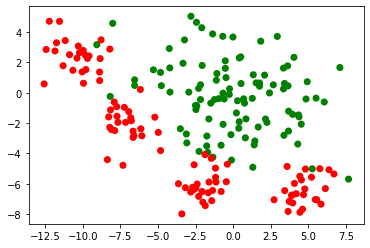

In [ ]:
# les échantillons du 1er groupes sont en rouge
# ceux du 2eme groupe en vert

cmp = np.array(['r','g'])
plt.figure()
plt.scatter(data[:,0],data[:,1], c=cmp[labels], s=50, edgecolors='none')

*Nous générons maintenant un premier découpage entre données d’apprentissage et données de test. Les données de test sont affichées avec cercles vides (`c='none'`), les données d’apprentissage avec des cercles remplis.*

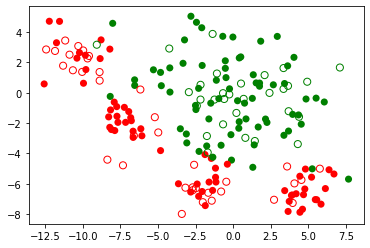

In [ ]:
from sklearn.model_selection import train_test_split

plt.figure()
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.33)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

* **Question**  
Combien d’échantillons le jeu de données d’apprentissage contient-il  
  
**Reponse**  
Le paramètre `test_size` permet de spécifier la taille du jeu de test, soit en proportion relative (réel entre 0 et 1), soit en nombre absolu d’exemples (entier > 1). Ici, `test_size = 0.33` ce qui signifie que l’on utilise 33% des observations pour le test, soit 66 exemples. Il reste donc 134 exemples pour le jeu d’apprentissage.

On aurait pu à l’inverse spécifier le paramètre `train_size=0.66` pour expliciter la taille du jeu d’apprentissage.


#### **Modèle Linéaire: AFD**  
Nous cherchons d’abord un modèle linéaire pour ce problème de discrimination entre deux classes et utilisons pour cela l’étape décisionnelle de l’analyse factorielle discriminante (AFD).

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# evaluation et affichage sur split1
lda.fit(X_train1, y_train1)
print("Le score sur le jeu d'apprentissage est de : {}".format(lda.score(X_test1, y_test1)))

Le score sur le jeu d'apprentissage est de : 0.9393939393939394


Nous pouvons examiner visuellement le modèle trouvé (la frontière de discrimination linéaire, c’est-à-dire ici une droite dans le plan) :

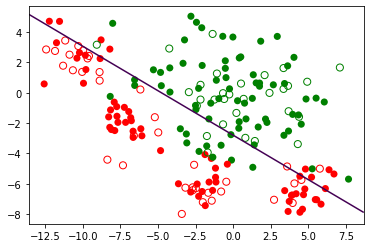

In [ ]:
# on créé une nouvelle figure sur laquelle on affiche les points

plt.figure()
plt.scatter(X_train1[:,0], X_train1[:, 1], c=cmp[y_train1], s=50, edgecolors='none')
plt.scatter(X_test1[:,0], X_test1[:,1], c='none', s=50, edgecolors=cmp[y_test1])

# On calcule pour chaque point du plan sa probabilité d'appartenir à chaque classe
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# On dessine la frontière correspondant à une probabilité de 0.5
plt.contour(xx, yy, Z, [0.5])
plt.show()

**Question**  
Générez d'autres découpages apprentissage l test (avec une même valeur `test_size=0.33`) et examinez la variabilité des résultats  
  
**Correction**  
Nous générons d'autre découpages l test et examinons à chaque fois le taux de bon classement sur les données de test, obtenu avec  `lda.score()`:

In [ ]:
for decoupage in range(10):
  X_trainv, X_testv, y_trainv, y_testv = train_test_split(data, labels, test_size = 0.33)
  ldav = LinearDiscriminantAnalysis()
  ldav.fit(X_trainv, y_trainv)
  print("score:", ldav.score(X_testv, y_testv) )

score: 0.7878787878787878
score: 0.8939393939393939
score: 0.8484848484848485
score: 0.8484848484848485
score: 0.8333333333333334
score: 0.8484848484848485
score: 0.9242424242424242
score: 0.8939393939393939
score: 0.8333333333333334
score: 0.8636363636363636


#### **Perceptron Multicouche**  
Nous cherchons maintenant un *PMC* pour faire la discrimination. Nous utilisons pour cela la classe *MLPClassifier* de scikit-learn. Il est très instructif d'examiner `les valeurs par défaut des paramètres`, valeurs que nous utilisons à l'exception de `solver`et `alpha`  
  
Nous utilisons d’abord un coefficient « d’oubli » (*weight decay*) `alpha = 1e-5`. Ce terme correspond à l’intensité de la régularisation L2 appliquée sur le perceptron.  


In [ ]:
from sklearn.neural_network import MLPClassifier

#Nous utiliserons ici l'algorithme l-BFGS pour optimiser le perceptrons
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)

# Evaluation et affichage sur split1
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1)
print("Le score en train est {}".format(train_score))

test_score = clf.score(X_test1, y_test1)
print("Le score en test est {}".format(test_score))

Le score en train est 1.0
Le score en test est 0.9242424242424242


Comme précédemment pour l’analyse factorielle discriminante, nous pouvons désormais tracer la frontière de décision du perceptron multicouche que nous venons d’optimiser.

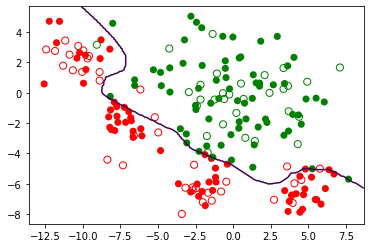

In [ ]:
# Créer une nouvelle figure
plt.figure()
# Afficher les nuages de points apprentissage (remplis) et de test (vides)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

# Calculer la probabilité de sorrtie du perceptrons pour tous les points du plan
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


# dessiner le contour correspondant à la frontière proba = 0,5
plt.contour(xx, yy, Z, [0.5])

**Question**  
Refaites l’expérience avec `alpha = 1`. Dans quel cas la régularisation est plus forte ? Quelle est la conséquence sur les résultats ?  
  

**Correction**

Le score en train est 0.9626865671641791
Le score en test est 0.9393939393939394


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


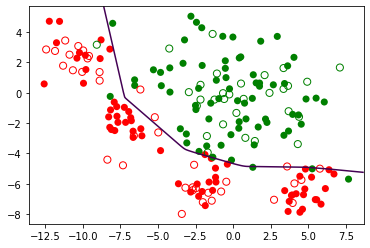

In [ ]:
from sklearn.neural_network import MLPClassifier

#Nous utiliserons ici l'algorithme l-BFGS pour optimiser le perceptrons
clf = MLPClassifier(solver='lbfgs', alpha=1)

# Evaluation et affichage sur split1
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1)
print("Le score en train est {}".format(train_score))

test_score = clf.score(X_test1, y_test1)
print("Le score en test est {}".format(test_score))

# Créer une nouvelle figure
plt.figure()
# Afficher les nuages de points apprentissage (remplis) et de test (vides)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

# Calculer la probabilité de sorrtie du perceptrons pour tous les points du plan
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


# dessiner le contour correspondant à la frontière proba = 0,5
plt.contour(xx, yy, Z, [0.5])

La régularisation est plus forte avec `alpha = 1` qu’avec `alpha = 1e-5`, car *α* est la pondération du terme de régularisation (ici *weight decay*). La frontière est plus lisse avec *alpha = 1*.  

**Question**  
Avec les autres découpages apprentissage / test examinez la variabilité des résultats. Dans quel cas elle est plus forte ?

In [ ]:
#Pour alpha =1e-5 

for decoupage in range(10):
  X_trainv, X_testv, y_trainv, y_testv = train_test_split(data, labels, test_size = 0.33)
  clf = MLPClassifier(solver='lbfgs', alpha=1e-5)
  clf.fit(X_trainv, y_trainv)
  print("score:", clf.score(X_testv, y_testv) )

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.9090909090909091
score: 0.9696969696969697
score: 0.9090909090909091


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.9545454545454546
score: 0.9090909090909091
score: 0.9545454545454546


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.8484848484848485
score: 0.9393939393939394
score: 0.9848484848484849
score: 0.9393939393939394


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#Pour alpha =1 

for decoupage in range(10):
  X_trainv, X_testv, y_trainv, y_testv = train_test_split(data, labels, test_size = 0.33)
  clf = MLPClassifier(solver='lbfgs', alpha=1)
  clf.fit(X_trainv, y_trainv)
  print("score:", clf.score(X_testv, y_testv) )

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.9393939393939394


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.9393939393939394
score: 0.9242424242424242


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.9848484848484849
score: 0.9545454545454546


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.9696969696969697
score: 0.9848484848484849


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score: 0.9545454545454546
score: 0.9090909090909091
score: 0.9242424242424242


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pour `alpha = 1` les résultats obtenus avec clf.score(X_test, y_test) sont plus stables au changement d’échantillon. La variabilité est plus forte pour `alpha = 1e-5.` La régularisation L2 permet de limiter l”overfitting, c’est-à-dire d’éviter que la frontière ne « colle » trop aux exemples d’apprentissage (au détriment de la généralisation).

#### **Régression avec modèles linéaires et PMC**  
Nous examinerons un problème simple de régression avec une seule variable prédictive.  
 

Nous générons des données à partir d’une loi normale bidimensionnelle

In [ ]:
# Definir matrices de rotation et de dilatation
rot = np.array([[0.94,0.34], [-0.34, 0.94]])
sca = np.array([[10, 0], [0, 1]])

# générer données bidimensionnelles
np.random.seed(60)
rd = np.random.randn(60, 2)
datar = rd.dot(sca).dot(rot)


* Visualisation de toutes les données

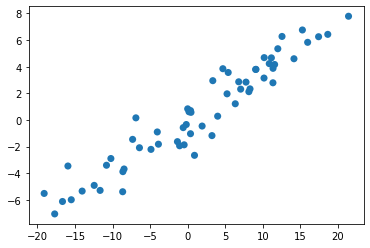

In [ ]:
plt.figure()
plt.scatter(datar[:,0], datar[:, 1], s = 50, edgecolors='none')
plt.show()

Nous générons maintenant un premier découpage entre données d’apprentissage et données de test :

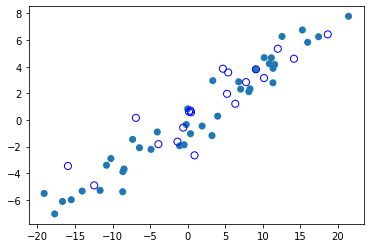

In [ ]:
from sklearn.model_selection import train_test_split

plt.figure()
X_train1, X_test1, y_train1, y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')
plt.show()

Nous cherchons d'abord un modèle linéaire pour ce problème de régression.   
Les résultats sont évalués ici à travers le **coefficient de détermination**, qui est le rapport entre la variance expliquée par le modèle et la variance totale(de la variable expliquée)

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

# évaluation et affichage sur split1
reg.fit(X_train1.reshape(-1, 1), y_train1)

# attention, score() ici ne renvoie pas l'erreur mais
# la valeur du coefficent de détermination R^2 !
coeff_train = reg.score(X_train1.reshape(-1,1), y_train1)
print("Coefficient de détermination de R^2 en train: {}".format(coeff_train))

coeff_test = reg.score(X_test1.reshape(-1,1), y_test1)
print("Coefficent de détermination R^2 en test: {}".format(coeff_test))

Coefficient de détermination de R^2 en train: 0.942040332387081
Coefficent de détermination R^2 en test: 0.7936655902477017


Nous pouvons ensuite, à partir des coefficients qui ont été estimés, tracer notre modèle de régression 

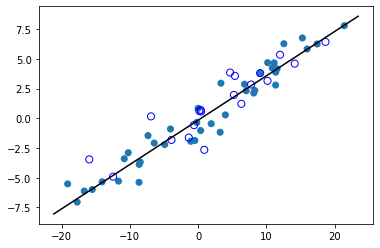

In [ ]:
plt.figure()
plt.scatter(X_train1, y_train1, s=50, edgecolors='none')
plt.scatter(X_test1, y_test1, c='none', s=50, edgecolors='blue')
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx, reg.predict(xx.reshape(-1, 1)), color='black')
plt.show()

**Question**  
Calculez l'erreur quadratique moyenne du modèle sur les données d'apprentissage ensuite sur les données de test

**Correction**  
La valeur résultant de `.score()` correspond au coefficient de détermination et non à l’erreur quadratique. Pour obtenir l’erreur quadratique moyenne du modèle nous calculons la norme L2 de la différence entre les prédictions et les observations, en nous servant de la fonction `linalg.norm()` de scipy.  
Pour rappel, l'erreur quadratique moyenne se calcule par:  
$ \frac{1}{n} \sum_{i=1}^{n} (\hat {y_i} - y_i)^2$

In [ ]:
from scipy import linalg
print("EQM pour l'apprentissage",linalg.norm(reg.predict(X_train1.reshape(-1,1)) - y_train1)**2 / len(y_train1))
print("EQM pour le test", linalg.norm(reg.predict(X_test1.reshape(-1,1)) - y_test1)**2 / len(y_test1))

EQM pour l'apprentissage 0.9810736341312382
EQM pour le test 1.8458269565957823


Une autre possibilité est de passer directement par la fonction `mean_squared_error` de scikit-learn:

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(reg.predict(X_test1.reshape(-1, 1)), y_test1)

1.8458269565957823

Nous pouvons augmenter la variance sur l’axe de plus faible variance en modifiant la matrice de dilatation :

In [ ]:
et2 = 2
sca = np.array([[10, 0], [0, et2]])

Attention, comme pour les données initiales, vous devez appliquer d’abord la dilatation `(.dot(sca))` et ensuite la rotation `(.dot(rot))`.  
  

**Question**  
Générez de nouvelles données avec cette nouvelle matrice de dilation. Quel est l’impact de cette augmentation de la variance sur le coefficient de détermination obtenu sur les données de test ? Essayez avec les valeurs 2, 4 et 6 pour `et2`. Vous pouvez faire une représentation graphique de l’évolution de la valeur obtenue pour `reg.score(X_test1.reshape(-1,1), y_test1)` lorsque `et2` augmente.  
  
**Correction**  
  
  

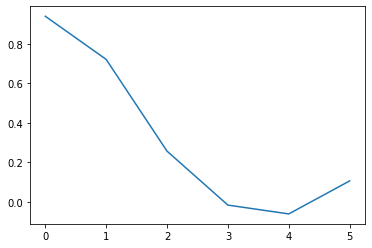

In [ ]:
coefdet = []
for et2 in range(1, 7):
  matrice_dilatation = np.array([[10,0], [0, et2]])
  datar = rd.dot(matrice_dilatation).dot(rot) 
  X_train1, X_test1, y_train1, y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)
  reg = linear_model.LinearRegression()
  reg.fit(X_train1.reshape(-1,1), y_train1)
  coefdet.append(reg.score(X_test1.reshape(-1,1), y_test1))

plt.figure()
plt.plot(coefdet)

Plus les données sont « dispersées » autour de la droite de régression, plus le coefficient de détermination est faible.

Nous cherchons maintenant un PMC pour faire la régression. Nous utilisons pour cela la classe *MLPRegressor* de scikit-learn.  
  
Nous utilisons d'abord un coefficient *<<d'oublie>> (weight decay)* `alpha=1e-5`. 

In [ ]:
from sklearn.neural_network import MLPRegressor  
clf = MLPRegressor(solver = 'lbfgs', alpha = 1e-5)

# évaluation et affichage sur split1
clf.fit(X_train1.reshape(-1, 1), y_train1)
coeff_train = clf.score(X_train1.reshape(-1,1), y_train1)
print("Le coefficient R² de train est {}".format(coeff_train))

coeff_test = clf.score(X_test1.reshape(-1,1), y_test1)
print("Le coefficient R² de test est {}".format(coeff_train))

Le coefficient R² de train est 0.24714315425333389
Le coefficient R² de test est 0.24714315425333389


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Comme précédemment, nous pouvons tracer le modèle de régression correspondant 

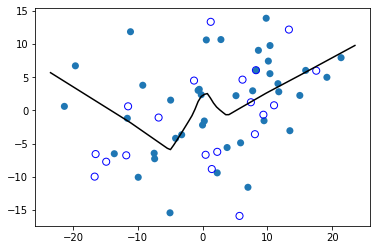

In [ ]:
plt.figure()
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')

**Question :**  
Refaites l’expérience avec `alpha = 1`. Quelle est la conséquence sur les résultats ?

**Correction :**

Le coefficient R² de train est 0.24718498865624838
Le coefficient R² de test est 0.24718498865624838


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


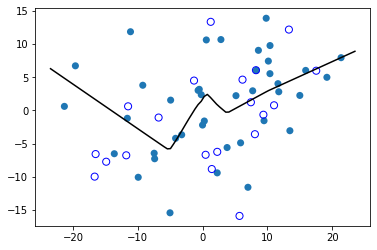

In [ ]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1)

# évaluation et affichage sur split1
clf.fit(X_train1.reshape(-1,1), y_train1)
coeff_train = clf.score(X_train1.reshape(-1,1), y_train1)
print("Le coefficient R² de train est {}".format(coeff_train))
coeff_test = clf.score(X_test1.reshape(-1,1), y_test1)
print("Le coefficient R² de test est {}".format(coeff_train))


plt.figure()
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')

on voit que la courbe de régression est plus lisse avec `alpha = 1` qu’avec `alpha = 1e-5.`

### ***Evaluation et Sélection de modèles décisionnels***  


**L’objectif** de cette séance de travaux pratiques est de présenter l’utilisation des techniques de validation croisée pour l’évaluation et la comparaison de modèles décisionnels, ainsi que des méthodes de recherche de valeurs pour les hyper-paramètres (comme le coefficient de régularisation).

À l’issue de cette séance, vous devriez pouvoir répondre à la question : comment déterminer le meilleur modèle pour mon problème ?

#### Estimation des performances par validation croisée  
Afin d'illustrer l'utilisation de la validation croisée, nous considérons un problème de classement similaire à celui examiné lors de la seance précédente. Nous générons plus de données avec informations de supervision et nous les partitionnons en un ensemble d'apprentissage et un ensemble de test.  
  
Nous employons des *PMC* avec une seule couche cachéé de 100 neuronnes et une valeur $\alpha = 1$ pour la constance de régularisation (pondération du terme d'oublie ou *weight decay*)  

La validation croisée sera utilisée pour estimer les performances de généralisation à partir de l'ensemble d'apprentissage et ensuite cette estimation sera comparée à l'estimation obtenue sur l'ensemble de test mise de côté au départ.  

In [ ]:
# importations
import numpy as np    # si pas encore fait
import matplotlib.pyplot as plt
plt.ion()  # mode interactif facilite utilisation figures multiples

# définir matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])  
  
# générer données classe 1
np.random.seed(150)
c1d = (np.random.randn(400,2)).dot(sca).dot(rot)

# générer données classe 2
c2d1 = np.random.randn(100,2)+[-10, 2]
c2d2 = np.random.randn(100,2)+[-7, -2]
c2d3 = np.random.randn(100,2)+[-2, -6]
c2d4 = np.random.randn(100,2)+[5, -7]  

data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

# générer étiquettes de classe
l1c = np.ones(400, dtype=int)
l2c = np.zeros(400, dtype=int)
labels = np.concatenate((l1c, l2c))


# découpage initial en données d'apprentissage et données de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

**Question**  
Combien le jeu d’apprentissage contient-il d’échantillons ?  
  
**Correction**  
le jeu d'apprentissage contient 50% du jeu de donnée data; donc 200 jeu de donné

Afin d’afficher les données, nous nous servirons du mode interactif qui ne bloque pas la console python. On entre en mode interactif avec `plt.ion()` et, dans ce mode, `plt.show()` n’est plus nécessaire. On quitte ce mode avec `plt.ioff()`. Comme dans le TP précédent, nous pouvons commencer par visualiser nos observations sous forme de nuage de points

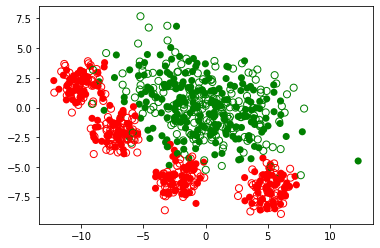

In [ ]:
plt.figure()
cmp = np.array(['r','g'])
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train],s=50,edgecolors='none')
plt.scatter(X_test[:,0],X_test[:,1],c='none',s=50,edgecolors=cmp[y_test])

Nous allons entraîner un perceptrons multicouche (*PMC*) sur ce jeu d'apprentissage. La classe ***KFold*** de scikit-learn permet de générer automatiquement les partitions du jeu d'apprentissage pour la validation croiséee

In [ ]:
# emploi de PMC  
from sklearn.neural_network import MLPClassifier  

# KFold pour differentes valeurs de k  
from sklearn.model_selection import KFold


# valeurs de k
kcvfs = np.array([2,3, 5, 7, 10, 13, 16, 20])

# Préparation des listes pour stocker les résultats
scores = list()
scores_std = list()

for kcvf in kcvfs: 
    # Pour chaque valeur de k
    kf = KFold(n_splits=kcvf, shuffle=True)
    scores_kf = list()

    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, test_idx in kf.split(X_train) :
      clf = MLPClassifier(solver='lbfgs', alpha=1)
      clf.fit(X_train[train_idx], y_train[train_idx])
      scores_kf.append(clf.score(X_train[test_idx], y_train[test_idx]))
    
    # Calcul de la moyenne et de l'ecart-type des performances obtenues
    scores.append(np.mean(scores_kf))
    scores_std.append(np.std(scores_kf))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Une fois que nous avons obtenu les scores de validation croisée pour différentes valeurs de *k*, nous pouvons faire un graphique des performances du modèle en fonction de *k* :

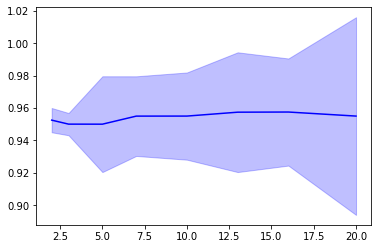

In [ ]:
# création de np.array à partir des listes
scores, scores_std = np.array(scores), np.array(scores_std)


# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure()
plt.plot(kcvfs, scores, 'b')
plt.fill_between(kcvfs, scores-scores_std, scores+scores_std, color='blue', alpha=0.25)

**Question :**
Que constatez-vous en examinant ce graphique ?   
  

**Correction :**  
On constate que, lors de l’augmentation de k, la performance moyenne se stabilise mais la variance augmente. Cela s’explique par le fait que, lorsque la valeur de k augmente, l’évaluation est faite (c’est à dire la moyenne de l’erreur est calculée) sur de moins en moins de données.  
  
**Question**  
Ajoutez des valeurs pour k (par ex. 40, 100, attention ce sera plus long…) et examinez de nouveau le graphique.  



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

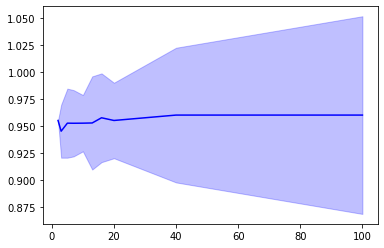

In [ ]:
# emploi de PMC  
from sklearn.neural_network import MLPClassifier  

# KFold pour differentes valeurs de k  
from sklearn.model_selection import KFold


# valeurs de k
kcvfs = np.array([2,3, 5, 7, 10, 13, 16, 20, 40, 100])

# Préparation des listes pour stocker les résultats
scores = list()
scores_std = list()

for kcvf in kcvfs: 
    # Pour chaque valeur de k
    kf = KFold(n_splits=kcvf, shuffle=True)
    scores_kf = list()

    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, test_idx in kf.split(X_train) :
      clf = MLPClassifier(solver='lbfgs', alpha=1)
      clf.fit(X_train[train_idx], y_train[train_idx])
      scores_kf.append(clf.score(X_train[test_idx], y_train[test_idx]))
    
    # Calcul de la moyenne et de l'ecart-type des performances obtenues
    scores.append(np.mean(scores_kf))
    scores_std.append(np.std(scores_kf))



# création de np.array à partir des listes
scores, scores_std = np.array(scores), np.array(scores_std)


# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure()
plt.plot(kcvfs, scores, 'b')
plt.fill_between(kcvfs, scores-scores_std, scores+scores_std, color='blue', alpha=0.25)

La variance augmente encore pour des valeurs supérieures de k.

**Question**  
Pour chaque modèle appris par validation croisée k-fold, ajoutez son évaluation sur les données de test mises de côté au départ X_test, y_test. Affichez les courbes sur le même graphique. Que constatez-vous ?  
  

**Correction**  
On ajoute des listes pour stocker ces résultats et on affiche leurs contenus :

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

array([0.00375   , 0.00656167, 0.00291548, 0.0031135 , 0.00229129,
       0.00319486, 0.00350432, 0.00307205, 0.00203101, 0.00194872])

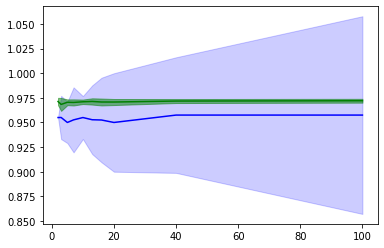

In [ ]:
scores = list()
scores_std = list()
test_scores = list()
test_scores_std = list()  


for kcvf in kcvfs:    # pour chaque valeur de k
    kf = KFold(n_splits=kcvf, shuffle=True)
    scores_kf = list()
    test_scores_kf = list()
    
    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, test_idx in kf.split(X_train):
      clf.fit(X_train[train_idx], y_train[train_idx])
      scores_kf.append(clf.score(X_train[test_idx], y_train[test_idx]))
      test_scores_kf.append(clf.score(X_test, y_test))
    
    # calcul de la moyenne et de l'écart-type des performances obtenues
    scores.append(np.mean(scores_kf))
    scores_std.append(np.std(scores_kf))
    test_scores.append(np.mean(test_scores_kf))
    test_scores_std.append(np.std(test_scores_kf))  


# création de np.array à partir des listes
scores, scores_std = np.array(scores), np.array(scores_std)
test_scores, test_scores_std = np.array(test_scores), np.array(test_scores_std)

# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure()
plt.plot(kcvfs, scores, 'b')
plt.fill_between(kcvfs, scores-scores_std, scores+scores_std, color='blue', alpha=0.2)

plt.plot(kcvfs, test_scores, 'g')
plt.fill_between(kcvfs, test_scores-test_scores_std, test_scores+test_scores_std, color='green', alpha=0.5)


test_scores_std


Les résultats montrent que l’estimation de l’erreur de généralisation par validation croisée sur les données d’apprentissage (courbes en bleu) reste en général optimiste par rapport à l’estimation sur des données de test supplémentaires (courbes en vert). Aussi, la variance des estimations sur les données de test est comparativement faible car ces données sont ici aussi volumineuses que les données d’apprentissage (`test_size=0.5`).

**Question**  
Réalisez l’estimation des performances en utilisant la ***validation croisée leave one out (LOO)***. Sur combien d’exemples d’apprentissage le PMC est-il appris ? Que constatez-vous en comparant les résultats de k-fold et de leave one out ?  
  
  **Correction**  


In [ ]:
# LOO
from sklearn.model_selection import LeaveOneOut


loo = LeaveOneOut()
loo.get_n_splits(X_train)


scores = list()
for train_idx, test_idx in loo.split(X_train):
    clf.fit(X_train[train_idx], y_train[train_idx])
    scores.append(clf.score(X_train[test_idx], y_train[test_idx]))

np.mean(scores)
np.std(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

0.20172691937369192

On constate que l’écart-type est bien plus élevé pour l’estimation leave one out que pour les estimations k-fold (pour toutes les valeurs considérées ici pour k).

#### Recherche des meilleurs valeurs pour les hyperparamètres  

Nous appliquerons d’abord la recherche systématique `grid search` pour trouver les meilleures valeurs de deux hyperparamètres pour les **PMC** dans la même tâche de classement que précédemment. Ces hyperparamètres sont le nombre de neurones dans l’unique couche cachée du PMC et la valeur de la constante de régularisation (par `weight decay`), α

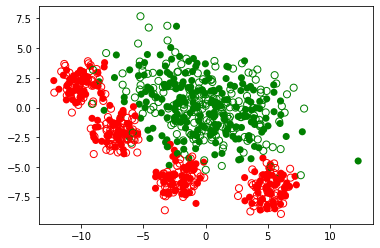

In [ ]:
# définir matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])


# générer données classe 1
np.random.seed(150)
c1d = (np.random.randn(400,2)).dot(sca).dot(rot)


# générer données classe 2
c2d1 = np.random.randn(100,2)+[-10, 2]
c2d2 = np.random.randn(100,2)+[-7, -2]
c2d3 = np.random.randn(100,2)+[-2, -6]
c2d4 = np.random.randn(100,2)+[5, -7]
data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))


# générer étiquettes de classe
l1c = np.ones(400, dtype=int)
l2c = np.zeros(400, dtype=int)
labels = np.concatenate((l1c, l2c))


# découpage initial en données d'apprentissage et données de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)


# affichage des données d'apprentissage et de test
cmp = np.array(['r','g'])
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train],s=50,edgecolors='none')
plt.scatter(X_test[:,0],X_test[:,1],c='none',s=50,edgecolors=cmp[y_test])

Afin d’utiliser la **recherche dans une grille** et la validation croisée pour comparer les modèles obtenus avec toutes les combinaisons de valeurs pour les hyperparamètres, scikit-learn a introduit la classe **GridSearchCV**  
  

  Il est nécessaire d’indiquer dans un « dictionnaire » quels sont les hyperparamètres dont on souhaite explorer les valeurs et quelles sont les différentes valeurs à évaluer. Chaque entrée du dictionnaire consiste en une chaîne de caractères qui contient le nom de l’hyperparamètre tel qu’il est défini dans l’estimateur employé. Nous nous servirons ici de `MLPClassifier`, les noms des paramètres peuvent donc être trouvés dans la présentation de cette classe. Nous considérons ici seulement deux paramètres, `hidden_layer_sizes` (nombre de neurones dans l’unique couche cachée) et `alpha` (la constante α de régularisation par *weight decay*)  
    
Dans l’appel de `GridSearchCV` nous indiquons ensuite pour `MLPClassifier` le solveur à utiliser systématiquement (qui n’est pas celui par défaut), ensuite le dictionnaire avec les valeurs des (hyper)paramètres à explorer et enfin le fait que c’est la validation croisée **k**-*fold* avec **k=5** qui est employée pour comparer les différents modèles.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


tuned_parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,),(200,)],'alpha':   [0.001, 0.01, 1, 2]}


clf = GridSearchCV(MLPClassifier(solver='lbfgs'), tuned_parameters, cv=5)


# exécution de grid search
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid

Scikit-learn exécute alors le programme suivant:  
* A partir des listes de valeurs pour les différents (hyper)paramètres sont générées toutes les combinaisons de valeurs,  
* Pour chaque combinaison, les performances des modèles correspondants sont évaluées par validation croisée 5-fold (appliquée uniquement sur les **données d'apprentissage** `X_train, y_train`),  
* Sont sélectionnées les valeurs des (hyper)paramètres correspondant aux meilleurs performances de validation croisée,  
* Avec ces valeurs pour les (hyper)paramètres un nouvel apprentissage est réalisé avec la totalité des données de `X_train, y_train` (et non seulement $\frac{k-1}{k}$ folds).  
  

Les lignes suivantes permettent d'afficher les résultats: les paramètres du meilleur modèle avec `clf.best_params_`, ainsi que les résultats de validation croisée obtenus pour toutes les combinaisons de valeurs pour les (hyper)paramètres (`clf.cv_results_`) donne accès à ces informations et à bien d'autres


In [ ]:
print(clf.best_params_)

{'alpha': 1, 'hidden_layer_sizes': (20,)}


**Question**  
Combien de *PMC* sont appris au  total dans cet exemple ?  
  

**Correction**  
Le nombre de combinaisons de (hyper)paramètres explorées est `len(tuned_parameters['hidden_layer_sizes'])` * `len(tuned_parameters['alpha'])`

In [ ]:
print(len(tuned_parameters['hidden_layer_sizes'])*len(tuned_parameters['alpha']))

24


On voit que le nombre de combinaisons de (hyper)paramètres explorées est de 24. Pour chacune de ces combinaisons, `cv=5` indique que **k=5** PMC différents sont appris. Donc un total de 24*5= 120

Nous pouvons retrouver les scores de tous les modèles appris durant la recherche par grille dans l’attribut `cv_results_`. Ici, nous pouvons tracer une visualisation des scores de la PMC pour chaque combinaison d’hyperparamètres.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


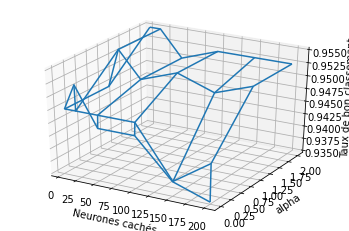

In [ ]:
n_hidden = np.array([5, 20, 50, 100, 150, 200])
alphas = np.array([0.001, 0.01, 1, 2])


# les coordonnées des points de la grille sont les valeurs des hyperparamètres (tuned_parameters)
xx, yy = np.meshgrid(n_hidden, alphas)
Z = clf.cv_results_['mean_test_score'].reshape(xx.shape)


# affichage sous forme de wireframe des résultats des modèles évalués
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("Neurones cachés")
ax.set_ylabel("alpha")
ax.set_zlabel("Taux de bon classement")
ax.plot_wireframe(xx, yy, Z)

**Question**  
L’aspect des résultats vous incite à affiner la grille ? Modifiez la grille, relancez une `GridSearchCV` et examinez les nouveaux résultats.  
  
**Correction**  
Il est surtout intéressant d’affiner la grille autour des valeurs optimales pour les (hyper)paramètres, lues sur le graphique affiché ou obtenues avec `clf.best_params_`. Il faut définir une nouvelle grille plus fine autour de ce point et appeler de nouveau `GridSearchCV`.  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

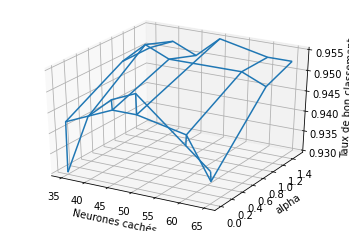

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


tuned_parameters = {'hidden_layer_sizes':[(35,), (40,),(45,), (50,), (60,),(65,)],'alpha':   [0.001, 0.01, 1, 1.5]}


clf = GridSearchCV(MLPClassifier(solver='lbfgs'), tuned_parameters, cv=5)


# exécution de grid search
clf.fit(X_train, y_train)


n_hidden = np.array([35, 40, 45, 50, 60, 65])
alphas = np.array([0.001, 0.01, 1, 1.5])


# les coordonnées des points de la grille sont les valeurs des hyperparamètres (tuned_parameters)
xx, yy = np.meshgrid(n_hidden, alphas)
Z = clf.cv_results_['mean_test_score'].reshape(xx.shape)


# affichage sous forme de wireframe des résultats des modèles évalués
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("Neurones cachés")
ax.set_ylabel("alpha")
ax.set_zlabel("Taux de bon classement")
ax.plot_wireframe(xx, yy, Z)

**Question**  
Quelle est la signification du paramètre `refit` de `GridSearchCV` ?  
  

**Correction**  
Si la valeur de ce paramètre est `True` (valeur par défaut) alors, une fois trouvées les meilleures valeurs pour les hyperparamètres, un nouveau modèle est appris avec ces valeurs-là sur la totalité des **N** données d’apprentissage `X_train, y_train` (sans en exclure **N/k**). Ce modèle est directement accessible dans l’attribut `.best_estimator_` et l’appel à `.predict()` sur l’instance de `GridSearchCV` (ici `clf`) permet de l’utiliser.  
  
**Question**  
Évaluez le modèle sélectionné sur les données de test `(X_test, y_test)`.  
  
**Correction**  
Le paramètres `refit` étant par défaut `True`, le modèle appris avec les meilleures valeurs pour les hyperparamètres est directement accessible via l’instance de `GridSearchCV` (ici `clf`), donc pour l’évaluer sur les données de test il suffit d’écrire

In [ ]:
clf.score(X_test, y_test)

0.9675

En pratique, la recherche par grille n’est pas nécessairement le meilleur choix. Plutôt que de définir à l’avance une grille de combinaisons d’hyperparamètres à évaluer, il est possible de réaliser une recherche aléatoire dans l’espace des hyperparamètres.

**Question**  
Utilisez la recherche aléatoire avec **`RandomizedSearchCV`**. Le « budget » (nombre total de combinaisons évaluées) peut être fixé avec `n_iter`. Motivez le choix des lois employées pour le tirage des valeurs des deux (hyper)paramètres `hidden_layer_sizes` et `alpha`.  
  
**Correction**  
Les distributions continues doivent être préférées pour les paramètres continus (comme α ici) et les distributions discrètes pour les paramètres discrets (comme le nombre de neurones dans la couche cachée). Les distributions uniformes (`uniform`, respectivement `randint`) sont la solution de facilité. Si des connaissances a priori nous permettent de préférer certains points de l’espace des paramètres, alors nous pouvons choisir d’autres distributions qui privilégient les voisinages de ces points. L’appel à `RandomizedSerchCV` aura la forme

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
rlf = RandomizedSearchCV(MLPClassifier(solver='lbfgs'), param_distributions=distributions,n_iter=50, cv=5)
rlf.

ValueError: ignored

In [ ]:
rlf.refit

True

### ***Cours - Arbres de décision***  
#### **Arbres de décision : motivation, définitions**  
  
**Définitions**  
En théorie des graphes, un arbre est un graphe non orienté, acyclique et connexe. L’ensemble des nœuds se divise en trois catégories :  
* Nœud racine (l’accès à l’arbre se fait par ce nœud),

* Nœuds internes : les nœuds qui ont des descendants (ou enfants), qui sont à leur tour des nœuds,

* Nœuds terminaux (ou feuilles) : nœuds qui n’ont pas de descendant.  
  
Les arbres de décision (AD) sont une catégorie d’arbres utilisée dans l’exploration de données et en informatique décisionnelle. Ils emploient une représentation hiérarchique de la structure des données sous forme des séquences de décisions (tests) en vue de la prédiction d’un résultat ou d’une classe. Chaque individu (ou observation), qui doit être attribué(e) à une classe, est décrit(e) par un ensemble de variables qui sont testées dans les nœuds de l’arbre. Les tests s’effectuent dans les nœuds internes et les décisions sont prise dans les nœuds feuille.  
  
Exemple de problème adapté à un approche par arbres de décision : comment répartir une population d’individus (e.g. clients, produits, utilisateurs, etc.) en groupes homogènes selon un ensemble de variables descriptives (e.g. âge, temps passé sur un site Web, etc.) et en fonction d’un objectif fixé (variable de sortie ; par exemple : chiffre d’affaires, probabilité de cliquer sur une publicité, etc.).  
  
**Apprentissage avec les arbres de décision**  
  
  On considère d’abord le problème de classement. Chaque élément x de la base de données est représenté par un vecteur multidimensionnel (x1,x2,...xn) correspondant à l’ensemble de variables descriptives du point. Chaque nœud interne de l’arbre correspond à un test fait sur une des variables xi :  
  * Variable catégorielle : génère une branche (un descendant) par valeur de l’attribut ;  
  * Variable numérique : test par intervalles (tranches) de valeurs.  
Les feuilles de l’arbre spécifient les classes.  

Une fois l’arbre construit, classer un nouvel candidat se fait par une descente dans l’arbre, de la racine vers une des feuilles (qui encode la décision ou la classe). A chaque niveau de la descente on passe un nœud intermédiaire où une variable xi est testée pour décider du chemin (ou sous-arbre) à choisir pour continuer la descente  
  
* **Principe de la construction :**  
Au départ, les points des la base d’apprentissage sont tous placés dans le nœud racine. Une des variables de description des points est la classe du point (la « vérité terrain ») ; cette variable est dite « variable cible ». La variable cible peut être catégorielle (problème de classement) ou valeur réelle (problème de régression). Chaque nœud est coupé (opération split) donnant naissance à plusieurs nœuds descendants. Un élément de la base d’apprentissage situé dans un nœud se retrouvera dans un seul de ses descendants.  
 * L’arbre est construit par partition récursive de chaque nœud en fonction de la valeur de l’attribut testé à chaque itération (top-down induction). Le critère optimisé est la homogénéité des descendants par rapport à la variable cible. La variable qui est testée dans un nœud sera celle qui maximise cette homogénéité.

 * Le processus s’arrête quand les éléments d’un nœud ont la même valeur pour la variable cible (homogénéité).






#### **Implémentation : ID3 (Iterative Dichotomiser 3)**   

 Nous examinons d’abord l’algorithme ID3 (Iterative Dichotomiser 3) introduit par Quinlan dans son article [QU86]. Ensuite nous présenterons les extensions IC4.5, ID5 et l’algorithme alternatif CART proposé par Breiman dans [BF84] qui à la différence de ID3 fonctionne aussi pour des attributs à valeurs continues.  
   
L’algorithme commence par le placement de tous les exemples d’apprentissage dans le nœud racine. Ensuite, chaque nœud est coupé sur un des attributs restants (qui n’a pas encore été testé). Le choix de cet attribut se fait à travers une mesure d’homogénéité par rapport à la variable cible. Cette mesure est le gain d’information obtenu par le découpage.  
   
On suppose que la variable cible a *m* valeurs distinctes (les étiquettes de classe). Pour un nœud *S* (interne ou feuille) on calcule son entropie par rapport à la cible comme suit :  
* Partitionner ***S*** sur les valeurs de la cible en *m* groupes: $C_1,...,C_m$.  
* Calculer $p_i, \; i=1...m,$la probabilité qu'un élément de $S$ se trouve dans $C_i, \; (p_i \cong \frac {|C_i|}{S} \; ou \; |C_i| $ est la taille du groupe $C_i$.  
* $H(S) = - \sum_{i=1}^{m}p_ilog(p_i)$ est l'entropie de $S$.  
$H(S)$ mesure l’écart de la distribution de la variable cible par rapport à la distribution uniforme :  
* $H(S) = 0$ si $S$ est homogène (tous les éléments sont dans la même classe : toutes les probabilités $p_i$ sont égales à 0, sauf une - qui est égale à 1).  
* $H(S) = max$ si toutes les probabilités $p_i$ sont égales (tous les groupes $C_i$ ont la même taille :$p_1=⋯=p_n=1/m$).  
  

Pour calculer le gain d’information dans un nœud interne $S$ sur l’attribut $a$:  
* Partitionner $S$ sur les valeurs de l’attribut $a$ en $k$ sous-groupes : $S_1,...,S_k$ ($k$ est le nombre de valeurs distinctes de l’attribut $a$),  
* $p_i$: la probabilité qu’un élément de $S$ appartient à $S_i ((p_i \cong \frac {|S_i|}{|S|}$,  
* Calculer $GI(S;a) = H(S)-\sum_{i=1}^{k}p_i H(S_i)$ le gain d'information sur l'attribut $a$.  
  

Avec ces précisions, **$l'algorithme \;ID3$** commence par la racine. Ensuite pour le nœud S en train d’être testé :  
* Calculer le gain d’information pour chaque attribut pas encore utilisé,  
* Choisir l’attribut a de gain d’information maximal,  
* Créer un test (décision) sur cet attribut dans le nœud $S$ et générer les sous-nœuds $S_1,...S_k$ correspondant à la partition sur l’attribut choisi $a$,  
* Récurrence sur les nœuds qui viennent d’être crées.  
**Sortie de la récursivité :**  
* Tous les éléments de S sont dans la même classe $(H(S)=0)$ : $S$ devient nœud feuille,  
* Pas d’attributs non utilisés : nœud feuille sur le classe majoritaire,  
* $S=∅$ : nœud feuille sur le classe majoritaire du parent (ce cas est nécessaire pour le classement de nouveaux échantillons).

#### **CART: Arbres de Classification et régression**  
Les principales différences sont les suivantes :
* CART pose seulement de questions-test binaires (arbres binaires).  
* Fonctionne aussi pour des attributs aux valeurs continues.  
* CART cherche tous les attributs et tous les seuils pour trouver celui qui donne la meilleure homogénéité du découpage.  
Quand un nœud interne $S$ est coupé sur l’attribut $j$, seuil $a_j$, il donne naissance à deux descendants :  
* Sous-nœud gauche $S_g (p_g≈|Sg|/|S|$) qui contient tous les éléments qui ont les valeurs de l’attribut $v_j≤a_j$,  
* Sous-nœud droit $S_d (p_d≈|Sd|/|S|)$ qui contient tous les éléments qui ont les valeurs de l’attribut $v_j>a_j$.  
  
Soit $I(S)$ une fonction qui mesure l’impureté de $S$ par rapport à la classe cible. CART étudie le changement de l’impureté par rapport au seuil et pour tous les attributs :  
* $E[I(S_{gd})]=p_gI(S_g)+p_dI(S_d)$ ou $E[⋅]$ est l’opérateur de moyenne statistique,  
* $ΔI(S)=I(S)−E[I(S_{gd})=I(S)−p_gI(S_g)−p_dI(S_d)$.

Le problème d’optimisation est le suivant :  
$$argmaxΔI(S)$$  
  
CART choisit donc l’attribut et le seuil qui maximisent la décroissance de l’impureté du nœud par rapport à la cible.  
  
En **classification** (classement) la mesure de l’impureté utilisée est l’**index (ou impureté) de Gini** qui est la vraisemblance qu’un élément du nœud soit incorrectement étiquetté par un tirage aléatoire qui respecte la loi statistique de la cible estimée dans le nœud.  
  
L’impureté (ou l’index de Gini $I_G(S)$) pour un noued $S$ est calculée comme suit :  
* Partitionner $S$ sur les valeurs de la cible en $n$ groupes : $C_1,...,C_n$,  
* Calculer $p_i$ : probabilité estimée qu’un élément de $S$ se retrouve dans $C_i (p_i≈|C_i|/|S|)$,  
* $I_G(S)=\sum_{i=1}^m p_i(1−p_i)=\sum_{i=1}^m (p_i−p_i^2)=1−\sum_{i=1}^m p_i^2$,  
* $I_G(S)=\sum_{i≠j} p_ip_j$ index de Gini,  
* $I_G(S)=0$ si $S$ est homogène (tous les éléments sont dans la même classe, donc impureté du groupe nulle).  
  
Toujours en **classification** on peut utiliser d’autres types de mesures d’**impureté**  
* $H(s)=−\sum_{i}p_ilog(p_i)$ (entropie)  
* $E(s)=1−max_ip_i$ (erreur de classification).  
  

Pour un problème de **régression** on optimise le **résidu quadratique moyen** : minimise la variance moyenne des groupes.  
* $argmin (p_gVar(S_g)+p_dVar(S_d))$  
  
**Classification de nouvelles données :**  
* Parcours de l’arbre pour arriver dans une feuille  
* Pour la classification : on considère la classe dominante (majoritaire) dans la feuille.  
* Pour la régression : on considère les valeurs dominantes dans la feuilles.  
   
**Avantages CART :**  
* Forme non paramétrique  
* Pas de sélection de variables nécessaire  
* Invariable aux transformation monotones des attributs  
* Bonne gestion des ouliers  



#### **Élagage et gestion de données manquantes**  
Pour des problèmes non-linéaires les arbres générés peuvent être de grande taille avec beaucoup de feuilles qui ont peu d’éléments (souvent un seul). Les premiers splits sont généralement les plus importants et les moins dépendants de l’échantillon, tandis que les suivants décrivent des particularités plus subtiles, pouvant être spécifiques à l’échantillon. Dans ce cas on parle de sur-apprentissage : le modèle généralise mal.

Pour pallier à ce problème il est souhaitable, afin de garder un niveau correct de généralité, d’élaguer l’arbre construit. Pour cela un taux d’erreur de prédiction par validation croisée est calculé pour différentes tailles de l’arbre (i.e., différents nombres de feuilles terminales) : l’arbre est alors à élaguer au niveau offrant l’erreur minimale.  
  
Dans le cas de données manquantes, la technique la plus utilisée est celle des surrogate splits ou variables-substituts : l’opération continue sur un autre attribut qui, à l’apprentissage, a donné un découpage (split) similaire  


#### **Extensions**  
Il existe plusieurs extensions développées principalement pour résoudre le problème de la variance élevée des estimateurs fournis par les arbre de décision. Dans la séance de cours suivante nous regarderons :

* **Bagging decision trees** : construction de plusieurs arbres par re-échantillonnage avec remise ; prise de décision par vote consensuel.

* **Forêts d’arbres décisionnels (ou forêts aléatoires)** : apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.

### ***Travaux pratiques - Arbres de décision***  
L’objectif de cette séance de travaux pratiques est d’exposer la mise en œuvre des arbres de décision pour les problèmes de classification et de régression.   
   
#### **Arbres de décision**  
Les arbres de décision sont des méthodes d'apprentissage non paramétriques utilisées pour des problèmes de classification et de régression. L'objectif est de créer un modèle qui prédit les valeurs de la variable cible, en se basant sur un ensemble de séquences de règles de décisions déduites à partir des données d'apprentissage. L'arbre approxime donc la cible par une succession de règles `if-then-else`. Ce paradigme s'applique aussi bien à des données catégorielles qu'à des données numériques. Plus l'arbre généré est complexe, mieux le modèle "explique" les données d'apprentissage mais plus le risque de sur-apprentissage(over-fitting) est élevé.  
  
Les arbres de décisions ont plusieurs **avantages** qui less rendent intéressants dans des contextes où il est utile de comprendre la séquence de décisions prise par le modèle:  
* Ils sont simple à comprendre et à visualiser.  
* Ils nécessitent peu de préparation des données (normalisation, etc...).  
* Le coût d'utilisation des arbres est logarithmiques.  
* Ils sont capables d'utiliser des données catégorielles et numériques.  
* Ils sont capables de traiter des problèmes multi-classe.  
* Modèle en boîte blanche: le résultat est facile à conceptualiser et à visualiser.  
   
Ces modèles présentent néamoins deux **désavantages** majeurs:  
* Sur-apprentissage: parfois les arbres générés sont trop complexes et généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur maximale `(max_depth`) et nombre minimal d'exemples par feuille (`min_samples_leaf`) permet d'éviter ce problème.  
* Ils peut arriver que les arbres générés ne soients pas équilibrés (ce qui implique que le temps de parcours n'est plus logarithmique). Il est donc recommandé d'ajuster la base de données avant la construction, pour éviter qu'une classe domine largement les autres (en terme de nombre d'exemples d'apprentissage).  


#####  **Arbres pour la classification**  
Dans scikit-learn, la classe `sklearn.tree.DecisionTreeClassifier` permet de réaliser une classification multi-classe à l'aide d'un arbre de décision.  


On  commence par importer les bonnes modules et construire l'objet arbre:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

Pour l'exemple, nous pouvons définir un jeu de données minimaliste (deux points, chacun dans une classe).  


In [ ]:
X = [[0,0], [1,1]]
y = [0,1]

L'arbre se construit comme d'habitude à l'aide de la méthode `.fit(X,y)`:

In [ ]:
clf = clf.fit(X,y)

La prédiction sur de nouveux échantillons se fait de façon habituelle avec `.predict(X):

In [ ]:
clf.predict([[2.,2.]])

array([1])

On peut aussi prédire la probabilité de chaque classe pour un échantillon (qui est calculée comme la fraction de données d'apprentissage dans chaque feuille):

In [ ]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

##### **Classification des données Iris**
`DecissionTreeClassifier` est capable de gérer des problèmes de classification à plusieurs classes (par exemple, avec les étiquettes 0,1, ..., K-1). Dans cet exemple nous allons travailler avec la base de données **Iris**, facilement accessible dans `sklearn`. Cette base contient 150 instances d'iris (un type de plante, chaque observation décrit sa morphologie). L'objetcif est de classer chaque instance en une des trois catégories: *Iris setosa, Iris virginica ou Iris versicolor*.  
   
Une des classes est linéairement séparable par rapport aux deux autres, mais les deux autres ne sont pas séparables une par rapport à l'autre.  
Les attributs du jeu de données sont:  
* Longueur de sépale,  
* Largeur de sépale,  
* Longueur de pétale,  
* Largeur de pétale,  
* Classe: Iris Setosa, Iris Versicolor ou Iris Virginica.  
   

Le jeu de données Iris étant très commun, scikit-learn propose une fonction native permettant de le charger en mémoire:  


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

* **Question**:  
Calculer les statistiques (moyenne et écart-type) des quatres variables explicatives:Longueur et largeur de sépale et pétale

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(X, columns = ['Sepal_Length','Sepal_Width','petal_lenth', 'petal_width'])

df.describe()


,Sepal_Length,Sepal_Width,petal_lenth,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df2 = pd.DataFrame(y, columns =["Specie"])
df2["Specie"]=pd.Categorical(df2["Specie"],ordered=False)
df2["Specie"]=df2["Specie"].cat.rename_categories(["Setosa","Versicolor","Virginica"])



In [ ]:
df2.describe()

,Specie
count,150
unique,3
top,Virginica
freq,50


Avant de construire le modèle, séparons le jeu de données en deux: 70% pour l'apprentissge, 30% pour le test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df2, train_size = 0.7, random_state = 0)

Nous pouvons maintenantconstruire un arbre de décision sur ces données:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Une fois l'apprentissage terminé, nous pouvons visualiser l'arbre, soit avec matplotlib en passant par la méthode `plot_tree`, soit avec l'outil `graphviz` (commande `dot`). Par exemple, avec matplotlib:

[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

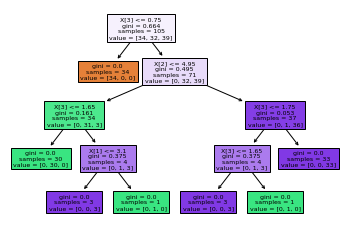

In [ ]:
tree.plot_tree(clf, filled = True)

Alternativement, il est possible de faire un export en produisant un fichier `.dot`qui est le format par défaut de graphiz:

In [ ]:
# On export le graph dans le fichier iris.dot

with open("iris.dot", 'w') as f:
  f = tree.export_graphviz(clf, out_file=f, filled=True)

Ensuite, en ligne de commande, il est possible de convertir ce fichier dans de nombreux formats, par exemple en pdf (commande shell):

In [ ]:
%%bash
dot -Tpdf iris.dot -o iris.pdf

Une fois le modèle construit, il est possible de l'utiliser pour la prédiction sur de nouvelles données:

In [ ]:
clf.predict(X_test)

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Setosa'], dtype=object)

On peut de cette façon calculer le score en test:

In [ ]:
clf.score(X_test, y_test)

0.9777777777777777

* **Question**:  
Changez les valeurs de paramètres `max_depth`et `min_samples_leaf`. Que constatez-vous ?

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

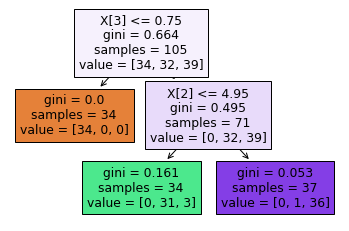

In [ ]:
tree.plot_tree(clf, filled = True)

On voit que dans l'arbre obtenu avec ces modification, on a plus d'éléments dans les feuilles, donc moins de noeuds et l'arbre est moins profond.

In [ ]:
clf.predict(X_test)

clf.score(X_test, y_test)


0.9111111111111111

* **Question**  
Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.  
  
Calculez le taux d’éléments mal classifiés sur l’ensemble de test.  
  
Faites varier (ou mieux, réalisez une recherche par grille avec `GridSearchCV`) les valeurs des paramètres `max_depth` et `min_samples_leaf` pour mesurer leur impact sur ce score.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df2, train_size = 0.05, random_state = 0)

for mdepth in [1,2,3,4,5,6,7]:
  clf = DecisionTreeClassifier(max_depth=mdepth)
  clf= clf.fit(X_train, y_train)
  print("Pour max_depth:", clf.score(X_test, y_test))


for msplit in [2,3,5,10, 15, 20]:
  clf = DecisionTreeClassifier(min_samples_split=msplit)
  clf= clf.fit(X_train, y_train)
  print("Pour min_simple_split:", clf.score(X_test, y_test))





Pour max_depth: 0.6573426573426573
Pour max_depth: 0.8881118881118881
Pour max_depth: 0.7972027972027972
Pour max_depth: 0.6643356643356644
Pour max_depth: 0.6643356643356644
Pour max_depth: 0.8881118881118881
Pour max_depth: 0.7062937062937062
Pour min_simple_split: 0.6643356643356644
Pour min_simple_split: 0.7552447552447552
Pour min_simple_split: 0.6223776223776224
Pour min_simple_split: 0.32167832167832167
Pour min_simple_split: 0.32167832167832167
Pour min_simple_split: 0.32167832167832167


Pour chercher de bonnes valeurs pour les paramètres on peut utiliser la validation croisée avec `GridSearchCV`:  


In [ ]:
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(df, df2, train_size = 0.7, random_state = 0)

pgrid = {"max_depth": [1,2,3,4,5,6,7],  "min_samples_split": [2,3,5,10, 15, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = pgrid,cv = 10)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)



0.9777777777777777

* ***Affichage de la surface de décision***  
Pour une paire d'attribut, c'est-à-dire pour des observations en deux dimensions, nous pouvons visualiser la surface de décision en 2 dimensions.  
D'abord on discrétise le domaine bidimensionnel avec un pas constant et ensuite on évalue le modèle sur chaque point de la grille.  
   
Dans cet exemple, nous ne gardons que la longueur et la largeur des pétales.  

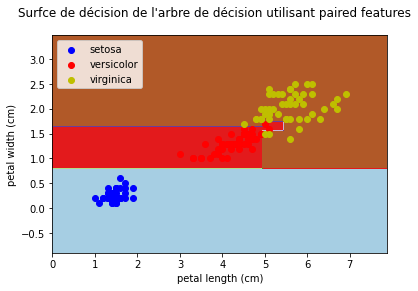

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# paramètres
n_classes = 3
plot_colors = "bry"     #blue, red and yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2,3]

# On ne garde seulement les deux attributs
X  = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min()-1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step ))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des point d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c= color, label = iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Surfce de décision de l'arbre de décision utilisant paired features")
plt.legend()
plt.show()

* **Question**  
Refaire l'affichage pour les autres paires d'attributs. Sur quelles paire la séparation entre les classes est la plus marquée ?

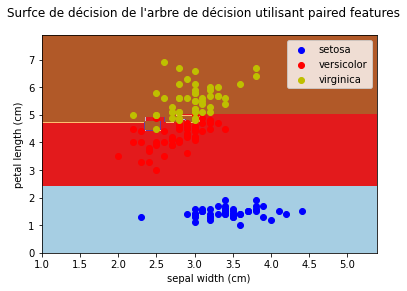

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# paramètres
n_classes = 3
plot_colors = "bry"     #blue, red and yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [0,1]
#pair = [0,2]
#pair = [0,3]
#pair = [1,2]
#pair = [1,3]

# On ne garde seulement les deux attributs
X  = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min()-1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step ))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des point d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c= color, label = iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Surfce de décision de l'arbre de décision utilisant paired features")
plt.legend()
plt.show()

Sur le pair [2,3] (longueur et largeur petale), la séparation entre les classe est la plus marquées

##### **Arbres de décisions pour la régression**  


Pour la régression avec les arbres de décision, scikit-learn offre la classe `DecisionTreeRegressor`. Comme pour la classification, la méthode `fit()` prend en entrée la paramètre X (attribut des observations). Attention: les `y` ne sont pas des étiquettes de classes mais des valeurs réelles. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = [[0,0], [2,2]]
y = [0.5, 2.5]

clf = DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1,1]])

array([0.5])

Dans l'exemple suivant nous allons construire un signal sinusoïdal affecté par un bruit blanc et nous allons apprendre un arbre de régression sur ces données d'apprentissage.

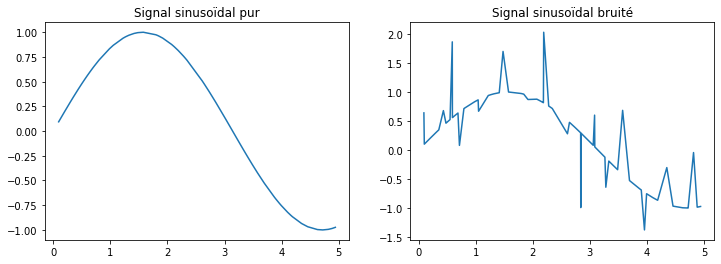

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


# creer les données d'apprentissage
np.random.seed(0)
X = np.sort(5*np.random.rand(80,1), axis = 0)
y = np.sin(X).ravel()

fig = plt.figure(figsize = (12,4))
fig.add_subplot(121)
plt.plot(X,y)
plt.title("Signal sinusoïdal pur")

# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 3*(0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X,y)
plt.title("Signal sinusoïdal bruité")
plt.show()

L'objectif est de régresser ce signal `y` à partir des valeurs de `X`. Pour cela, nous utilions un arbre de régression

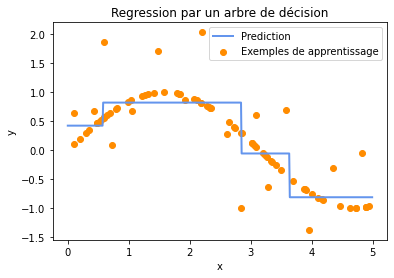

In [ ]:
# Apprendre le modèle
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prediction sur la même plage de valeurs
X_test = np.arange(0.0,5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X,y, c="darkorange", label="Exemples de apprentissage")
plt.plot(X_test, y_pred, color = "cornflowerblue", label="Prediction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression par un arbre de décision")
plt.legend()
plt.show()

* **Question**:  
Changer la valeur du parametre `max_depth`. Que se passe-t-il si on prend une valeur trop grande ? Trop petite ? Changer le taux d’éléménts affectés par le bruit (le `y[::5]`). Quand tous les éléments sont affectés par le bruit, faut-il préférer une valeur élevée ou faible pour `max_depth` ?

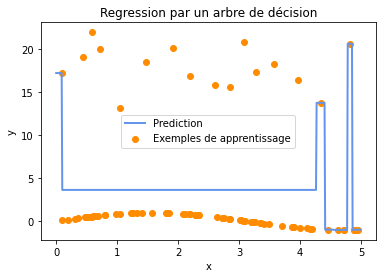

In [ ]:
y[::5] += 2*(0.25 - np.random.rand(16))

# Apprendre le modèle
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X, y)

# Prediction sur la même plage de valeurs
X_test = np.arange(0.0,5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X,y, c="darkorange", label="Exemples de apprentissage")
plt.plot(X_test, y_pred, color = "cornflowerblue", label="Prediction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression par un arbre de décision")
plt.legend()
plt.show()

Si `max_depth`a une valeur trop grande, le modèle suit le bruit , nous sommes donc en situation de sur-apprentissage.  
Si `max_depth`a une valeur trop petite, le modèle resultant ne suit pas bien les données: Nous sommes dans une situation de sous-apprentissage.  
Dans les deux cas le pouvoir de généralisation est affecté. Il faut donc préférer une valeur intermédiaire, qui permet de faire un compromis en fonction du coût des erreurs (cela dépend de l'application)

* **Question**  
Pour approfondir, chargez la base de données Diabetes du module `sklearn.datasets` et faire une partition aléatoire en partie apprentissage et partie test (70% apprentissage, 30% test). Construire un modèle d’arbre de regression sur cette base. Calculer l’erreur quadratique moyenne sur l’ensemble de test. Faire un `grid search` pour trouver la valeur du paramètre `max_depth` qui minimize cette erreur.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
        
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target, test_size=0.30, random_state=0)
        
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
mean_squared_error(y_test, y_predicted)
# --> 4365.3425018803518
        
pgrid = {"max_depth": [2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_predicted)
# --> 4029.0729322641987
grid_search.best_params_
# -->{'max_depth': 2}

{'max_depth': 2}

### ***Forêts Aléatoires***  
Dans cette séance nous examinons plusieurs stratégies pour construire (ou assembler) des classifieurs performants à partir de classifieurs de base plus modestes. Ce sont les "méthodes d'agrégation". Nous allons commencer par une discussion des avantages et des défauts des arbres de décision, surtout le problème des estimateurs de variance élevée. Ensuite nous présenterons les deux approches classiques conçues pour répondre à ce problème: le "Bagging" et les "Forêts aléatoires" et nous finirons par une courte intoduction au Boosting, qui permet de combiner la sortie de plusieurs classifieurs simples pour en obtenir un meilleur résultat.  
  
#### ***Estimateurs de variance élevée***  
* **Avantages des arbres de décision**  
Les arbres de décision ont un nombre de propriétés qui font d'eux un outil précieux, surtout quand il s'agit de faire l'analyse rapide d'un jeu de données ou d'élaborer un prototype de classifieur:  
* Modèle *White box*: le résultats est facile à conceptualiser, à visualiser et à interpréter.  
* Ils nécessitent peu de préparation de données (e.g. normalisation, etc...)  
* Le coût d'utilisation des arbres est logarithmique (classification d'une nouvelle données très rapide).  
* Ils sont capables d'utiliser des données catégorielles et continues.  
* Ils sont capables de gérer des problèmes multi-classes.  
* Ils ont un bon comportement par rapport aux valeurs extrêmes(outliers).  
* Ils gèrent bien les données manquantes.  
   
* **Défauts des arbres de décision**  
  * Parfois les arbres générés ne sont pas équilibrés (ce qui implique que le temps de parcours n'est plus logarithmique). Il est donc recommandé d'équilibrer la base de données avant la construction, pour éviter qu'une classe domine (en terme de nombre d'exemples d'apprentissage).  
  * Sur-apprentissage: parfois les arbres générés sont trop complexes et généralisent mal(solution:élagage, le contrôle de la profondeur de l'arbre et de la taille des feuilles).  
  * Ils sont **instables**: des changements légers dans les données produisent des arbres très différents. Les changements des noeuds proches de la racine affectent beaucoup l'arbre résultant. On dit que les arbres produisent des **estimateurs de variance élevée**.  
  
Le besoin de répondre à ce troisième problème, qui n'admet pas de solution par optimisation algorithmique, a conduit aux approches de type *Bagging* et "Forêts aléatoires".  
   
L'idée derrière et celle de la **Réduction de variance**: On utilise pour cela la moyenne de plusieurs estimateurs, calculés sur des données légèrement différentes, en somme utiliser le hasard pour améliorer les performances des algorithmes de base (qui sont les arbres de décision CART ici).  
   

#### ***Bagging***  


Nous commençons par le *Bagging (Boostrap Agregating)*. Soit la base d'appprentissage décrite comme suit:  
* Les données sont décrites par les attributs: $A_1,...,A_1$, classe:$C$,  
* Données d'apprentissage: $(x_i,y_i), \; x_i \in R^p, \; y_i \in R,$ $i=1,...,N$,  
* $y_i$ peuvent être des valeurs continues ou discrètes (étiquettes des classes),  
* $x_i = (a_i^{(i)},...,a_p^{(i)})$.  
  
On considère **$G(x)$** un modèle de prédiction appris sur un échantillons de données $z = \{(x_i, y_i)\}_{i=1}^n$ (e.g. arbre de décision CART).  
  
* **Algorithme bagging**:  
* On tire au hasard dans la base d'apprentissage B échantillons avec remise $z_i, i=1,...,B$ (chaque échantillons ayant $n$ points) - appelés échantillons bootstrap;  
* Pour chaque échantillons $i$ on calcule le modèle $G_i(x)$;  
* Régression: agrégation par la moyenne $G(x) = \frac {1}{B} \sum_{i=1}^B G_i(x)$;  
* Classement: agrégation par vote $G(x) = Votemajoritaire(G_1(x),...,G_B(x))$  
  
* **C'est l'estimateur moyenne qui aide a réduire la variance**:  
* $X_1,...,X_n$ v.a.i.i.d de moyenne $\mu$ et variance $\sigma^2$,  
* La moyenne $\frac {1}{n}(X_1 + X_2 + ... + X_n)$ est de variance $\frac {\sigma^2}{n}$.  

La critère de performance pour le calcul de B est l'erreur *OOB (Out Of Bag)*:  
* Au lieu de faire un découpage classsique test/validation de la base d'apprentissage, pour chaque $x_k$ de la base d'apprentissage l'erreur OOB de prédiction est donné par la moyenne des erreurs des classifieurs $G_i$ tel que $x_i \notin z_i$ (donc $x_i$ ne fait pas partie de leur échantillon de bootstrap de $G_i$).  
* On choisit $B$ ou l'erreur se stabilise et ne descend plus.  
   
* **Les défauts du bagging**:  
Les estimateurs $G_i$ ne sont pas en réalité indépendants. En effet, $G_i$ sont calculés sur des échantillons qui se recouvrent fortement (tirage avec remise) et donc ils sont corrélés.  
   
Si $X_1,...,X_B$ sont issus de v.a. identiquement distribuées (mais pas indépendantes) de moyenne $\mu$, variance $\sigma^2$ et corrélation $\rho=Corr(X_i, X_j), \forall i \neq j$, alors $Y = \frac {1}{B}(X_1 + X_2 + ... + X_B)$ est de variance.  
$$Var(Y) = \rho \sigma^2 + \frac {1- \rho}{B} \sigma^2$$  
Quand $B$ est grand le $2^{ème}$ terme est négligeable mais le 1er non.  
  
L'amélioration proposée par les forêts aléatoires est de baisser la corrélation entre les $G_i$ à l'aide d'une étape supplémentaire de randomisation.  


#### **Forêts aléatoires**  
Les forêts aléatoires sont donc une amélioration du *bagging* pour les arbres de décision CART dans le but de rendre les arbres utilisés plus indépendants (moins corrélés).  

Caractéristiques:  
* Elles donnent de bons résultats surtout en grande dimension,  
* Elles sont très simples à mettre en oeuvre,  
* Elles ont peu de paramètres.  
   
* **Algorithme "Forêts aléatoires"**  
* On tire au hasard dans la base d'apprentissage B échantillons avec remise $z_i, i=1,...,B$ (chaque échantillon ayant n points).  
* Pour chaque échantillon $i$ on construit un arbre CART $G_i(x)$ selon un algorithme légèrement modifié: a chaque fois qu'un noeud doit être coupé (étape "split") on tire au hasard une partie des attributs (**q** parmi les **p** attributs) et on choisit le meilleur découpage dans ce sous-ensemble.  
* Régression: agrégation par la moyenne $G(x)=\frac {1}{B} \sum_{i=1}^B G_i(x)$.  
* Classement: agrégation par vote $ G(x) = Vote majoritaire(G_1(x),..., G_B(x)).$  
   
Les arbres sont moins corrélés car :  
* Ils sont appris sur un ensemble différents d'attributs.  
* Ils sont construits sur des échantilons différents.  
  
Commentaires:  
* On se limite en général à des arbres pas très profonds (pour le *Bagging* il faut des arbres profond pour réduire leur corrélation, mais les arbres très profond souffrent de sur-apprentissage).  
* Chaque arbre est petit donc moins performant, mais l'agrégation compense pour ce manquement (chaque attribut se retrouve typiquement dans plusieurs arbres).  
* Comme pour le *Bagging* on utilise l'erreur OOB pour prévenir le sur-apprentissage (on choisit B là où l'erreur se stabilise et ne descend plus).  
  
* **Paramètres (valeurs par défaut)**:  
* Classement: $q= \sqrt p$, taille noeud minimale 1;  
* Régression: $ q = p/3$, taille noeud minimale 5.  
  
En pratique les valeurs "idéales" dépendent beaucoup de la base (et il faut les trouver par validation croisée).  

OOB vs erreur de test sur la base "Spambase". On voit que le comportement de l'erreur OOB est similaire à celui de l'erreur de test.  
   
* **L'importance des attributs:  
Les attributs peuvent être évalués pour voir leur impact dans la construction de l'arbre (mesure de Gini) ou la robustesse aux erreurs de capteurs et/ou bruit sur la classification (erreur OOB):  
* Gini: Le changement dans l'impureté (ou gain d'information) dans chaque noeud cumulé sur tous les arbres de la forêt.  
* Erreur OOB: Tous les échantillons OOB sont évalués par l'arbre et l'erreur mesurée. Ensuite on permute aléatoirement les valeurs sur chaque attribut $j$ et on mesure le taux d'erreur à nouveau. La valeur finale est la dégradation moyenne (changement du taux d'erreurs) sur tous les arbres.



#### **Boosting**  
Le principe du boosting est de combiner les sorties de plusieurs classifieurs faibles (weak classifier) pour obtenir un résultat plus fort (strong classifier). Le classifieur faible doit avoir un comportement de base un peu meilleur que l'aléatoire: taux d'erreurs inférieur à 0.5 pour une classification binaire (i.e qu'il ne se trompe pas plus d'une fois sur deux en moyenne, si la répartition des classe est équilibrées). Chaque classifieur faible est pondéré par la qualité de sa classification: mieux il classe, plus il ser important. Les exemples mal classés auront un poids plus important (on dit qu'ils sont boostés) vis-à-vis de l'apprenant faible au prochain tour, afin qu'il pallie le manque.  
  
Un des algorithme les plus utilisés en *boosting* s'appelle *AdaBoost*, abréviation de adaptative boosting.  
   
* **Algorithme AdaBoost**  
* Données d'apprentissage $(x_1,y_1),...,(x_n,y_n), x_i \in X, y_i \in \{-1,1 \}$.  
* Une famille *$G$* de classifieurs faibles (appelés aussi parfois "règles faibles")  
  
Au départ tous les exemples d'apprentissage ont un même poids ($w_i = 1/n$). A chaque itération (supposons que $m$ désigne le numéro de l'itération courante) on choisit dans $G$ le classifieur $G_m$ qui minimise l'erreur de classement sur les données d'apprentissage pondérées par les $w_i$. Ensuite on calcule $\alpha_m$, la pondération de $G_m$ dans le mélange final, on met à jour le poids $w_i$ pour booster les éléments qui ont été mal classés et on passe à l'itération suivante.

### ***Travaux pratiques -Forêts aléatoires***  
L'objectif de cette séance de travaux pratiques est de montrer l'utilisation des méthodes d'agrégation (*bagging, forêts aléatoires, boosting*) pour les problèmes de classification et de régression, en python avec Scikit-learn

#### **Méthodes d'agrégation**  
Les méthodes ensemblistes (ou d'agrégation) pour les algorithmes d'apprentissage statistique (en anglais: *ensemble learning) sont basées sur l'idée de combiner les prédictions de plusieurss prédicteurs (ou classifieurs) pour une meilleur généralisation et pour compenser les défauts éventuels de prédicteurs individuels.  
En général, on distingue deux familles de méthodes de ce type:  
1. Méthodes par moyennage (bagging, forêts aléatoires) où le principe est de faire la moyenne de plusieurs prédictions en espérant un meilleur résultat suite à la réduction de variance de l'estimateur moyenne.  
2. Méthodes adaptatives (boosting) où les paramètres sont itérativement adaptés pour produire un meilleur mélange.  
   
Dans la suite nous explorerons chacune de ces classes d'algorithme en scikit-learn et présenterons quelques comparaisons.  


#### **Bagging**  
Les méthodes de type *bagging* construisent plusieurs instances d'un estimateur, calculées sur des échantillons aléatoires tirés de la base d'apprentissage (éventuellement une partie des attrinuts, également sélectionnés de façon aléatoire), et ensuite combine les prédictions individuelles en réalisant leur moyenne pour réduire la variance de l'estimateur. Leur avantage principal réside dans le fait qu'ils construisent une version améliorée de l'algorithme de base, sans demander de modification de cet algorithme. Le prix à payer est un coût de calcul plus élevé. Comme elles réduisent le sur-apprentissage, les méthodes *bagging* fonctionnent très bien avec des prédicteurs "forts". Par contraste, les méthodes *boosting* sont mieux adaptées à des prédicteurs faibles (weak learners).  
   
Dans Scikit-learn, les méthodes de *bagging* sont implémentées via la classe `BagginClassifier` et `BaggingRegressor`. Les constructeurs prennent en paramètres un estimateur de base et la stratégie de sélection des points et attributs:  
* `base_estimator`: optionnel(defaut=None). Si None alors l'estimateur est un arbre de décision.  
* `max_samples`: la taille de l'échantillon aléatoire tiré de la base d'apprentissage.  
* `max_features`: Le nombre d'attributs tirés aléatoirement.  
* `bootstrap`: boolean, optionnel (default=True). Tirage des points avec remise ou non.  
* `bootstrap_features`: boolean, optionnel (default=False). Tirage des attributs avec remise ou non.  
* `oob_score`: boolean. Estimer ou non l'erreur de généralisation OOB (Out of Bag).  
   
Le code suivant construit un ensemble des classifieurs. Chaque classifieur de base est un `KNeighborsClassifier` (i.e k-plus-proches-voisins), chacun utilisant au maximum 50% des points pour son apprentissage et la moitié des attributs (features):  


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5,
                            max_features = 0.5)

Dans cet exemple nous allons utiliser la base de données `digits`, qui contient 10 classes (images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 attributs (8 pixels par 8).  

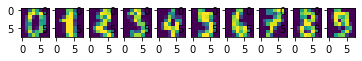

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


digits = load_digits()

# Affichage des 10 premières images
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
  fig.add_subplot(1, 10, i+1)
  plt.imshow(digit)
plt.show()

Pour ce TP, nous allons utiliser comme classifieur de base un arbre de décision `DecisionTreeClassifier`. Ce classifieur nous permet d'établir des performances de référence(c'est un ensemble à 1 modèle).  

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


X,y = digits.data, digits.target
clf = DecisionTreeClassifier()
clf.fit(X,y)
accurary = clf.score(X, y)
print(accurary)

1.0


Sur la base d'apprentissage `accuracy=1`. Pour plus de réalisme, découponsla base de données en un jeu d'apprentissage et un jeu de test afin de voir le comportement de généralisation de l'arbre sur des données différentes des celles d'apprentissage: 

In [ ]:
from sklearn.model_selection import train_test_split

# 90% des données pour le test, 10% pour l'apprentissage
c
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7008652657601978


* **Question**  
Construire la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Que pouvons nous conclure ?  


In [ ]:
N =100
accuracies = []
for i in range(N):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.90)
  clf = DecisionTreeClassifier()
  clf.fit(X_train, y_train)
  Z=clf.predict(X_test)
  accuracies.append(clf.score(X_test, y_test))
  print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))



0.6526576019777504
0.6990111248454882
0.7021013597033374
0.6211372064276885
0.6934487021013597
0.6594561186650185
0.6792336217552534
0.6718170580964153
0.7119901112484549
0.6625463535228677
0.6779975278121138
0.6569839307787392
0.6860321384425216
0.6520395550061805
0.6990111248454882
0.6724351050679852
0.7194066749072929
0.7262051915945612
0.6928306551297899
0.6668726823238567
0.6699629171817059
0.65389369592089
0.6749072929542645
0.6248454882571075
0.6446229913473424
0.6835599505562423
0.6891223733003708
0.688504326328801
0.6755253399258344
0.6674907292954264
0.6749072929542645
0.6427688504326329
0.7126081582200248
0.7249690976514215
0.6798516687268232
0.6508034610630408
0.7051915945611866
0.6953028430160693
0.7280593325092707
0.6248454882571075
0.6792336217552534
0.7496909765142151
0.6823238566131026
0.688504326328801
0.6835599505562423
0.6705809641532756
0.7187886279357231
0.6903584672435105
0.6996291718170581
0.6835599505562423
0.6242274412855378
0.7045735475896168
0.69221260815822

On obtient des valeurs autours de la moyenne:mean=0.68 et de ecartype:std=sigma=0.03 (Attention, nos valeurs seront largement différentes à cause du tirage aléatoire.  
Si on considère une distribution normale, les valeurs de "accuracy" vont se trouver avec une probabilité de 75% dans une fourchette autour de la moyenne, ce qui donne une intervalle de variation de 0.23=23%. les arbres de décisions produisent donc des classifieurs avec un taux d'erreur qui n'est pas très stable, selon l'échantillon d'apprentissage.  


Pour comparer, construisons maintenant un classifieur *bagging* sur nos données, toujours basé sur les `DecisionTreeClassifier`

In [ ]:
clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5,
                        max_features = 0.5, n_estimators = 200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8819530284301607


* **Question**:  
Calculer la variance de la valeur `accuracy`sur 100 tirages pour la séparation apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure?

In [ ]:
N =100
accuracies = []
for i in range(N):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.90)
  clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5,
                        max_features = 0.5, n_estimators = (i+1)*10)
  clf.fit(X_train, y_train)
  Z=clf.predict(X_test)
  accuracies.append(clf.score(X_test, y_test))
  print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8016069221260815
0.8393077873918418
0.8257107540173053
0.8609394313967862
0.8881334981458591
0.9054388133498146
0.8559950556242274
0.869592088998764
0.8708281829419036
0.8906056860321384
0.8986402966625463
0.8992583436341162
0.8974042027194067
0.9054388133498146
0.9011124845488258
0.9079110012360939
0.8992583436341162
0.8955500618046972
0.92336217552534
0.9252163164400494
0.869592088998764
0.880716934487021
0.8930778739184178
0.9066749072929543
0.8714462299134734
0.8949320148331273
0.9023485784919654
0.9066749072929543
0.904202719406675
0.9054388133498146
0.904202719406675
0.8677379480840544
0.904202719406675
0.9103831891223733
0.8918417799752781
0.880716934487021
0.8980222496909765
0.896168108776267
0.8912237330037083
0.8689740420271941
0.904202719406675
0.8899876390605687
0.8918417799752781
0.9177997527812114
0.88442521631644
0.8936959208899876
0.9283065512978986
0.899876390605686
0.8782447466007417
0.8868974042027195
0.8930778739184178
0.9134734239802225
0.8955500618046972
0.90173

On obtient un meilleur classifieur (``accuracy`` ~ 89%), qui en plus est beaucoup plus stable : ``stdev`` autour de 1%.

* **Question**:  
Construire le graphique `accuracy`vs `n_estimators`. Que constatez-vous ?

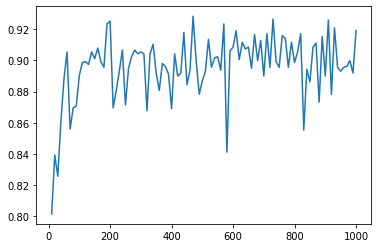

In [ ]:
plt.plot([10*(i+1) for i in range(N)], accuracies)
plt.show()

 Le taux d'erreur diminue avec ``n_estimators``, mais à  partir d'une valeur il se stabilise, donc on ne gagne rien à partir de cette valeur de ``n_estimators``, si ce n'est que l'algorithme devient plus lent

* **Question**:  
Faites varier les parametres `max_samples` et `max_features`. Pour quelles valeurs on obtient le meilleur résultat ? On pourra notamment utiliser `GridSearchCV` pour réaliser une recherche systématique

 Pour chercher des bonnes valeurs pour les paramètres on utilise la validation croisée avec ``GridSearchCV``,

In [ ]:
from sklearn.model_selection import GridSearchCV


digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        
        
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8], "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9010011123470523
max_samples: 0.8
max_features: 0.8


Le programme affiche  un score de 90% obtenu pour ``max_samples = 0.8`` et ``max_features = 0.8``

##### **Forêts Aléatoires**  
L'algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le *bagging*, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des noeuds dans le but de réduire la variance de l'estimateur obtenu. Les deux objets Pythonn qui implémentent les forêts aléatoires sont `RandomForestClassifier` et `RandomForestRegressor`. Les paramètres les plus importants sont :  
* `n_estimators`: integer, optional (default=10). le nombre d'arbres.  
* `max_features`: le nombre d'attributs à considérer àà chaque split.  
* `max_samples`: la taille de l'échantillon aléatoire tiré de la base d'apprentissage.  
* `min_sample_leaf`: le nombre minimal d'éléments dans un noeud feuille.  
* `oob_score`: boolean. Estimer ou non l'erreur de généralisation OOB(Out Of Bag).  
  
Par la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur `RandomForestClassifier`. Comme d'habitude, on sépareles données en gardant 10% pour l'apprentissage et 90% pour le test.  


In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


digits  = load_digits()

X,y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.90)


On peut désormais créer et entraîner notre modèle:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Puis réaliser les prédictions et calculer le score de test:

In [ ]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9221260815822002


* **Question**  
Comment la valeur de la variable `accuracy`se compare avec le cas *bagging* qui utilise le même d'arbres (200 dans notre cas) ?

In [ ]:
# pour les arbres de décisions
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision:" + str(clf.score(X_test, y_test)))

Arbre de décision:0.6724351050679852


In [ ]:
# arbre de décision avec bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5,
                        max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z=clf.predict(X_test)
print("Bagging (200 arbres):" + str(clf.score(X_test, y_test)))

Bagging (200 arbres):0.915327564894932


In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt Aléatoire (200 arbres):" + str(clf.score(X_test, y_test)))

Forêt Aléatoire (200 arbres):0.919035846724351


Ce qui confirme notre attente: les forêts aléatoires produisent un classifieur un peu meilleur sur cette base de données.

* **Question**  
Construire la variance de la valeur `accuracy`sur 100 tirage pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (*bagging*) ?

In [ ]:
# Pour le Bagging
import numpy as np

N = 100

bagging_accuracies = []
for i in range(N):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
  clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=30)
  clf.fit(X_train, y_train)
  bagging_accuracies.append(clf.score(X_test, y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))

0.9340044493882091 0.01217809724786695


In [ ]:
# Pour le forêt Aléatoire

import numpy as np

N = 100

rf_accuracies = []
for i in range(N):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
  clf = RandomForestClassifier(n_estimators=30)
  clf.fit(X_train, y_train)
  rf_accuracies.append(clf.score(X_test, y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))


0.9594660734149053 0.007019817699712231


Nous avons donc non seulement un plus faible taux moyen d'erreurs, mais aussi une variance plus faible.  


* **Question**  
Construire le graphique `accuracy` vs `n_estimators`. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

10 0.932146829810901
20 0.949944382647386
30 0.9688542825361512
40 0.9621802002224694
50 0.967741935483871
60 0.9610678531701891
70 0.9666295884315906
80 0.9632925472747497
90 0.9721913236929922
100 0.9632925472747497
110 0.9699666295884316
120 0.9710789766407119
130 0.967741935483871
140 0.9755283648498332
150 0.96440489432703
160 0.9755283648498332
170 0.9688542825361512
180 0.9733036707452726
190 0.9721913236929922
200 0.9699666295884316
210 0.9755283648498332
220 0.9655172413793104
230 0.9733036707452726
240 0.9699666295884316
250 0.9710789766407119
260 0.9766407119021134
270 0.9699666295884316
280 0.9710789766407119
290 0.9755283648498332
300 0.9688542825361512


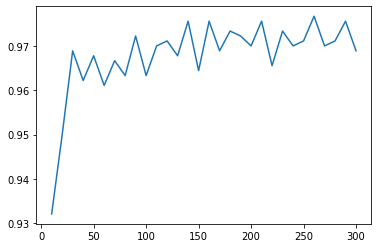

In [ ]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        
for i in range(N):
  clf = RandomForestClassifier(n_estimators=(i+1)*10)
  clf.fit(X_train, y_train)
  accuracy.append(clf.score(X_test,y_test))
  print((i+1)*10, accuracy[i])
        
plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

A partir de `n_estimators=50`, le resultats commence à osciller autour de la moyenne donc on ne gagne plus rien en augumentant la valeur.



* **Question**  
Regardez dans la documentation les *ExtraTreesClassifier* et refaites la classification avec ce type de classifieur. Comparez avec *RandomForestClassifier*.

  Les Extra-Trees (*Extremely Randomized Trees*) randomisent encore plus la construction de l'arbre et sont utilisés surtout pour des données numériques. Par rapport aux forêts aléatoires, ils abandonnent l'utilisation des échantillons de bootstrap et pour chaque *feature* candidat choisissent un seuil de coupure aléatoire. L'idée fonctionne plutôt bien pour de problèmes d'apprentissage qui ont un grand nombre de *features* qui varient de manière continue. Souvent leur taux d'erreur est supérieur aux forêts aléatoires, le temps de calcul plus faible et les arbres générés sont plus grands.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X,y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.90)


clf = ExtraTreesClassifier(n_estimators = 200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9357231149567367


Avec `random Forêst` on avait eu comme accuracy=0.92, alors qu'avec `ExtraTreeClassifier` on un accuracy=0.94. Alors on peut dire que `ExtraTreeClassifier` nous donne un classifier un peu meilleur que celui donnée par `random Forest`

##### **Boosting**  
Le principe du *boosting* est d'évaluer une séquence de classifieurs faibles (weak learners) sur plusieurs versions légèrement modifiées des données d'apprentissage. Les décisions obtenues sont alors combinées par une somme ponderée pour obtenir le modèle final.  
  
Avec scikit-learn, c'est la classe `AdaBoostClassifier` qui implémente cet algorithme. Les paramètres les plus importants sont:  
* `n_estimators`: integer, optional (default=10). Le nombre de classifieurs faibles.  
* `learning_rate`: Contrôle la vitesse de changement des poids par itération.  
* `base_estimator`: (default=DecisionTreeClassifieur) le classifieur faible utilisé.  
  
Dans la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur `RandomForestClassifier`:  

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Adaboost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=5),
                         n_estimators = 200, learning_rate = 2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.9060568603213844


 * **Question**  
 
 
 Le paramètre ``max_depth`` contrôle la profondeur de l'arbre. Essayez plusieurs valeurs pour voir l'impact de l'utilisation d'un classifieur faible vs plus fort (``max_depth`` élevé ou éliminer le paramètre). Testez aussi l'effet du paramètre ``learning_rate`` et le nombre de classifieurs.

In [ ]:
max_dept = [2, 3,4,5,10,15]
for i in max_dept:
  clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=i),
                         n_estimators = 200, learning_rate = 2)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  print(accuracy)


0.8584672435105068
0.8782447466007417
0.9023485784919654
0.9097651421508035
0.5914709517923362
0.6310259579728059


``max_depth`` faible génére des arbres peu profonds qui ont tendance à  généraliser mal. ``max_dept`` élevé génère des arbres trop profonds (sur-apprentissage) donne encore une mauvaise généralisation 

In [ ]:
 # Pour n_estimateur = 300
 clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2),
                         n_estimators = 300, learning_rate = 2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

# Pour n_estimateur = 30
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2),
                         n_estimators = 30, learning_rate = 2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8597033374536465
0.7700865265760197


Par contre, un mauvais classifieur faible (par exemple ``max_depth = 2``) peut etre compensé par un parametre ``n_estimators`` plus grand : ``n_estimators = 30`` donne ``accuracy = 0.77``, ``n_estimators = 300`` donne ``accuracy = 0.86``.

In [ ]:
learning_rate = [0.05, 0.5,1,1.5,2,5.5]
for i in learning_rate:
  clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2),
                         n_estimators = 200, learning_rate = i)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  print(accuracy)

0.8003708281829419
0.8955500618046972
0.5475896168108776
0.5216316440049443
0.8658838071693449
0.7564894932014833


 Une valeur plus faible de ``learning_rate`` permet d'améliorer le score, mais pas au-delÃ  d'une certaine valeur

### ***SVM Lineaires***  
"Statistics is the grammar of science"  
  
#### Objectifs:  
Dans cette séance nous examinons les machines à vecteurs support dans leur version lineaire, et dans les séances à suivre les SVM non-linéaires et les autres algorithmes à noyaux.  
  
On donne un ensemble d'apprentissage $\{(x_i, y_i \}_{1,...,n}$ où $x_i \in X$ (souvent $X = R^d$) et $y_i \in \{-1, +1 \}$. Dans un problème de classement à deux classes, le but est de construire une fonction $f: X --> R$ qui permet de prédire si un nouvel exemple $x \in X$ appartient à la classe -1 ou à la classe +1.  

On cherche alors une "surface de séparation" $f:X --> R$ tel que si $f(x) >0$ alors $x$ est affecté à la classe +1 et si $f(x)< 0 $ alors $x$ est affecté à la classe -1.  
***  
Par exemple Problème de séparation à deux classes: trouver la fonction f tel que $f(x)=0$ sépare les deux classes avec le moins d'erreurs possible.  
  
***  
  
#### **Séparateurs à vaste marge**  
Pour un problème de classification linéaire on suppose que les deux classes (-1 et +1) sont séparables par un hyperplan, la fonction $f$ a donc la forme:  
$$f(x) = \sum_{i=1}^n w_ix_i + b = \angle(w,x) > + b$$  
où $w$ est le vecteur orthogonal à l'hyperplan et $b$ est le déplacement par rapport à l'origine.    
   
Pour juger la qualité d'un hyperplan en tant que séparateur on utilise la distance entre les exemples d'apprentissage et ce séparateur. Plus précisement, la "marge" d'un problème d'apprentissage est définie comme la distance entre le plus proche exemple d'apprentissage et l'hyperplan de séparation. Pour un hyperplan $H$ on a :  
$$Marge(H) = min \, d(x_i, H)$$  
Les SVM linéaires cherchent le séparateur (l'hyperplan de séparation) qui maximise la marge. On appelle cela "séparateur à vaste marge".  
***  
Par exemple le séparateur idéal correspond intuitivement à l'hyperplan qui passe "au milieu" entre les données sans préférence pour une classe ou une autre. C'est le séparateur de marge maximale.  
***  
  
Les éléments de la classe 1 les plus proches de ce séparateur se trouvent à la même distance du séparateur que les éléments les plus proches de la classe 2 (cette distance est égale à la marge). Ces éléments, soit d'une classe soit de l'autre, s'appellent "vecteurs de support".  
***  
Les "vecteurs de support" se trouvent a une distance égale à la marge d'un côte ou de l'autre de l'hyperplan de séparation.  
***  
  
Intuitivement, ce sont les vecteurs de support qui déterminent le séparateur (par l'intermédiaire de la fonction distance et de leur configuration géométrique).  
  
Une fois le séparateur $f(x)$ trouvé, la classification d'un nouvel exemple se fait par une simple décision à seuil zéro:  
* $f(x) = 0 $: l'élément se trouve sur la frontière de séparation, pas de décision,  
* $f(x) > 0 $: classe 1,  
* $f(x) < 0$: classe 0.  
  
#### **SVM linéaire (cas séparable)**  
On suppose d'abord que les données d'apprentissage sont linéairement séparables, c'est à dire qu'il existe un hyperplan qui sépare les données sans erreur. Dans ce cas, on cherche l'hyperplan de marge maximale:  
$$f(x) = \; < w,x > + b = w^Tx + b $$  
Si $x_s$ est un vecteur de support et $H = \{ x|w^T x + b = 0 \}$, alors la marge est donnée par :  
$$Marge = 2d(x, H) = 2 \frac  { |w^T x_s +b | } { ||w|| } $$  
En fait cette quantité est deux fois la marge (par rapport à la définition donnée en haut). On utilise cette quantité pour des raisons de simplicité de l'écriture des équations plus tard, mais ceci ne change en rien le problème de l'optimisation (maximiser la marge ou deux fois la marge conduit à la même solution ).  
  
Les paramètres $w$ et $b$ ne sont pas uniques, $kw$ et $kb$ donnent la même surface de séparation:  
$$kw^T x + kb = k(w^T x + b) = 0 $$  
On impose alors la condition de normalisation $|w^T x_s + b| =1 $ pour les vecteurs de support $x_s$, ce qui conduit à :  
$$Marge = \frac {2}{ ||w|| }$$  
On arrive donc au problème d'optimisation suivant (appelé problème primal):  
$$\left\{\begin{matrix}
 \underset{min}{w,b} \frac {1}{2} ||w||^2   \\ 
 tq \; y_i(w. x_i + b) \geq 1, \; i=1,...,n 
\end{matrix}\right.$$  
  
Rappelons la condition de normalisation: $w.x_i + b= 1$ si $x_i$ est un vecteur de support de la classe +1 et $w.x_i + b = -1$ si $x_i$ est un vecteur de support de classe -1. Dans ce cas, comme le problème est séparable, il n'y a pas d'exemple d'apprentissage entre les deux hyperplans, $w.x_i + b = 1$ et $w.x_i + b = -1$ (on dit par abus de langage "dans la marge"). Nous obtenons:  
* Si $y_i = 1$ alors $w.x_i+b \geq 1$ et donc $y_i(w.x_i+b) \geq 1$,  
* Si $y_i=-1$ alors $w.x_i+b \leq -1$ et donc $y_i(w.x_i+b) \geq 1$  
Ce qui explique les conditions présentes dans le problème d'optimisation.  
   
La résolution de ce problème peut se faire directement par des méthodes stochastique de type Gauss-Saidel, algorithmes de point interieur, de type Newton ou de type gradient conjugué.  
  
Il est toutefois mieux de passer à la formulation duale de ce problème:  
* Le dual est un problème quadratique de taille $n$ (égal au nombre d'observations).  
* Pour ce type de problème (optimisation quadratique) il exist des algorithmes bien étudiés et très performants.  
* La formulation duale fait apparaître la matrice de Gram $XX^T$, ce qu permet de gérer le cas non linéaire à travers des algorithmes à noyaux (qui seront étudiés dans la séance suivante).  
Pour obtenir la formulation duale, on introduit les multiplicateurs $ \alpha_i$ de Lagrange. Le lagragien est donné par:  
$$L(w,b, \alpha) = \frac {1}{2} ||w||^2 + \sum _{i=1}^n \alpha_i [y_i(w^T x_i + b-1)]$$  
Le lagrangien doit être optimisé par rapport à $w, \, b$ et les multiplicateurs $\alpha$. En annulant les dérivées partielles du lagrangien par rapport a $w$ et $b$, on obtient les relations:  
$$\frac {\partial L}{\partial b} (w^*, b^*, \alpha^*) = 0 \Rightarrow \sum _{i=1}^n \alpha_i y_i = 0$$   
$$\frac {\partial L}{\partial w} (w^*, b^*, \alpha^*) = 0 \Rightarrow w^*= \sum _{i=1}^n \alpha_i y_i x_i$$   
Par substitution dans l'équation du lagrangien en haut on obtient le problème dual:  
$$\left\{\begin{matrix}
 \underset{\alpha}{max} \sum _{i=1}^n \alpha_i - \sum _{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \\ 
 t.q. \\  
 \alpha_i \geq 0, \; i=1,...,n \; (admissibilité \; duale) \\  
 \sum _{i=1}^n \alpha_i y_i = 0 \; (stationarité)

\end{matrix}\right.$$  
La solution du problème dual donne les multiplicateurs de Lagrange optimaux $\alpha_i^*$. A partir des $\alpha_i$ on obtient $w^*$ par les relations en haut. Le paramètre $b^*$ est obtenu à partir de la relation $|x_s^T w^* + b^*| = 1$ valable pour tous les vecteurs de support $x_s$.  
  
Observation : les vecteurs de support sont ceux pour lesquels $\alpha_i \geq 0$. En général leur nombre est beaucoup plus petit que le nombre total d’éléments dans la base d’apprentissage. Ajouter des échantillons qui ne sont pas des vecteurs supports à l’ensemble d’apprentissage n’a aucune influence sur la solution finale, c’est à dire seulement les vecteurs de support interviennent dans la fonction de décision (l’expression de la surface séparatrice entre les deux classes). Cette fonction de décision permettant de classer une nouvelle observation $x$ est donnée par :  
$$f^*(x) = \sum_{i=1}^n \alpha_i^* y_i x_i^T x + b^*$$  
*  L’hyperplan solution ne dépend que du produit scalaire entre le vecteur d’entrée et les vecteurs de support. Cette particularité permet l’utilisation de fonctions noyau pour aborder des problèmes non linéaires (traités dans la séance de cours suivante).
















#### **Données non séparables linéairement**  
Souvent il arrive que même si le problème est linéaire, les données sont affectées par un bruit (par ex. de capteur) et les deux classes se retrouvent mélangées autour de l’hyperplan de séparation. Pour gérer ce type de problème on utilise une technique dite de **marge souple**, qui tolère les mauvais classements :  
* Rajouter des variables de relâchement des contraintes $\epsilon_i$  
* Pénaliser ces relâchements dans la fonction objectif.   
***  
Par exemple plus un exemple est éloigné du mauvais coté du séparateur, plus la variable de relâchement $\epsilon_i$ a une valeur importante.  
***  
L'idée est de modéliser les erreurs potentielles par des variables d'écart positives $\epsilon_i$ associées aux observations $(x_i, y_i), i=1,...,n$.  
  
Si un point $(x_i, y_i)$ vérifie la contrainte de marge $y_i(w^Tx_i+b) \geq 1$ alors la variable d'écart (qui est une mesure du coût de l'erreur) est nulle.  
  
Nous avons donc deux situations:  
* Pas d'erreur: $y_i(w^Tx_i+b) \geq 1 \Rightarrow \epsilon_i = 0$.  
* Erreur: $y_i(w^Tx_i+b) \lt 1 \Rightarrow \epsilon_i = 1 - y_i(w^Tx_i+b) \gt 0$.  
On associe à cette definition une fonction coût appelée "coût charnière": 
$$\epsilon_i = max(0,1-y_i(w^Tx_i+b))$$


### ***Travaux Pratiques- SVM linéaires***  
L'objectif de cette séance de travaux pratiques est d'illustration l'utilisation des machines à vecteurs de support (Support Vector Machines, SVM) pour les problèmes de classification linéaires en python avec scikit-learn.   

#### **Machines à vecteurs de support linéaires**  
Les machines à vecteurs de support (SVM:Support Vector Machines) sont une classe de méthodes d'apprentissage statistiques basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linèaires, versions à noyaux) qui peuvent s'appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.  
  
Les avantages des SVM:  
* Très efficaces en dimension élevée.  
* Ils sont aussi efficaces dans le cas où la dimension de l'espace est plus grande que le nombre d'échantillons d'apprentissage.  
* Pour la décision, n'utilisent pas touts les échantillons d'apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.  
  
Désavantages:  
* Si le nombre d'attributs est beaucoup plus grand que le nombre d'échantillons, les performances sont moins bonnes.  
* Comme il s'agit de méthodes de discrimination entre les classes, elles ne fournissent pas d'estimations de probabilités.  


##### **Jeu de données Iris**  
Dans Scikit-learn, les SVM sont implémentées dans le module `sklearn.svm`. Dans cette partie nous allons nous intéresser à la version linéaire (Scikit-learn utilise les biblio. *libLinear* et *libSVM* ). Nous allons utiliser le jeu de données Iris déja rencontré dans les séances précédentes. Pour pouvoir afficher les résultats, on va utiliser seulement les premiers deux attributs (longueur et largeur des sépales).  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split


# Chargement des données
iris = datasets.load_iris() 

Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données:

In [ ]:
X, y = iris.data[:, :2], iris.target

# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire:  

In [ ]:
C = 1.0  # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

* **Question**  
Calculez le score d'échantillons bien classifiés sur le jeu de données de test. 

In [ ]:
Z = lin_svc.predict(X_test)
print(lin_svc.score(X_test, y_test))

0.72


Visualisation maintenant la surface de décision apprise par notre modèle:

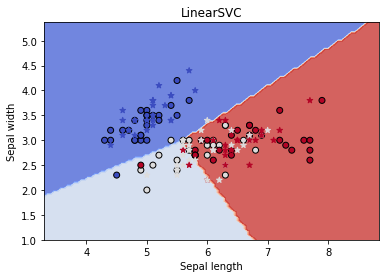

In [ ]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() -1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max()+1

#Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha = 0.8)

# Afficher aussi les points d'apprentissage 
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c= y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label = "test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("LinearSVC")
plt.show()

* **Question**:  
Testez differentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


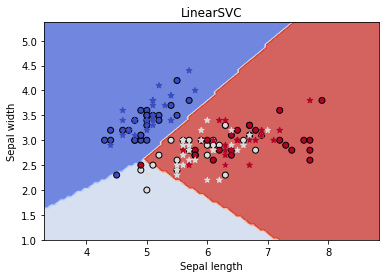

In [ ]:
C = 20  # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() -1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max()+1

#Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha = 0.8)

# Afficher aussi les points d'apprentissage 
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c= y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label = "test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("LinearSVC")
plt.show()

On voit que plus C auguemente, plus on a du mal a discriminé les surfaces

* **Question**  
D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?  
  
Oui on peut dire que c'est un peu adapté mais il faut beaucoup l'améliorer. 

Nous verrons dans le prochain TP que scikit-learn permet de manipuler des machines à vecteurs de support avec des noyaux non-linéaires dans la classe SVC.

Les modèles linéaires `LinearSVC()` et `SVC(kernel='linear')`, comme nous l’avons déjà dit, produisent des résultats légèrement différents à cause du fait qu’ils optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classe de manière différente (linearSVC utilise One-vs-All et SVC utilise One-vs-One).

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


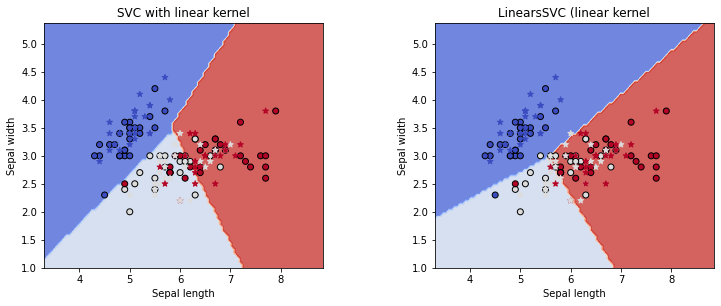

In [ ]:
C=1.0
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ["SVC with linear kernel", "LinearsSVC (linear kernel"]

fig = plt.figure(figsize=(12,4.5))

for i, clf in enumerate((svc, lin_svc)):
  plt.subplot(1, 2, i+1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Utiliser une palette de couleurs
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title(titles[i])

plt.show()


Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

* **Question**  
Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

##### **Jeu de données Digits**  
Le jeu de données Digits est une collection d’images de chiffres manuscrits (nous l’avons déjà utilisé dans le TP sur les forêts aléatoires). Elles peuvent se charger directement depuis scikit-learn :

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

### ***Travaux pratiques - Méthodes à noyaux***  
L’objectif de cette séance de travaux pratiques est de montrer l’utilisation des machines à vecteurs de support (Support Vector Machines, SVM) pour les problèmes de classification non-lineaire en python avec Scikit-learn.

#### **Machines à vecteurs de support (SVM)**  
Les machines à vecteurs de support (SVM : Support Vector Machines) sont une classe des méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :  
* Très efficaces en dimension élevée.

* Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le nombre d’échantillons d’apprentissage.

* N’utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.  
  
Désavantages :  
* Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances seront moins bonnes.

* Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas directement des estimations de probabilités.  
   





Dans Scikit-learn, les SVM sont implémentées dans le module sklearn.svm. Dans cette partie nous allons nous intéresser à la version à noyaux (Scikit-learn utilise la bibliothèque LibSVM déjà discutée).

Relisez le TP SVM linéaire (partie Scikit-learn) pour vous remettre dans le contexte (quels sont les classes Python utilisées et leurs paramètres)   
  
Nous allons reprendre la classification sur les données Iris. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
iris = datasets.load_iris()
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

* **Question**  
Refaites la classification de la base de données `Iris` mais avec un noyau gaussien. Testez l'effet du paramètre d'échelle du noyau (`gamma`) et du paramètre du régularisation paramètre de régularisation `C`.  
  
Comme dans le TP précédent, nous pouvons afficher la frontière de décision en ne conservant que deux variables explicatives:  


In [ ]:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Text(0.5, 1.0, 'SVM RBF')

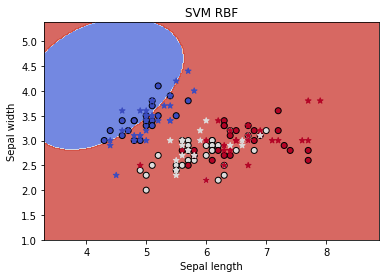

In [ ]:
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h=0.02

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

### ***Travaux pratiques - Algorithmes à noyaux***  
L’objectif de cette séance de travaux pratiques est de montrer l’utilisation des plusieurs algorithmes à noyaux en python (scikit-learn). Nous allons aborder dans cette séance les One Class SVM (OCSVM) et SVM pour la régression.

Les OCSVM sont des estimateurs de support de densité pour des données multidimensionnelles. L'idée derrière l'implémentation est de trouver l'hyperplan le plus éloigné de l'origine qui sépare les données de l'origine.  
   
Dans scikit-learn, les *One-Class* SVM sont implémentés dans le module `sklearn.svm`. Nous utilisons un noyau gaussien pour faire la détection des *outliers* dans un échantillons de données en deux dimensions. Pour cet exemple, nous générons deux clusters gaussiens auquels nous ajoutons 10% de données anormales, tirées au hasard uniformément dans l'espace à deux dimensions considéré:  


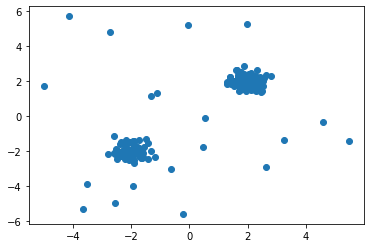

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# On créé deux groupes séparés (échantillons de gaussiennes)

N=200
data1 = 0.3*np.random.randn(N// 2,2) + [2,2]
data2 = 0.3*np.random.randn(N // 2, 2) - [2,2]

# On créé 10% de données anormales (*outliers*)
outliers = np.random.uniform(size=(N//10,2), low=-6, high=6)

# Les données = groupes + anomalies
X = np.concatenate((data1, data2, outliers))

plt.scatter(X[:, 0], X[:, 1]) and plt.show()

Nous pouvons ensuite créer le modèle de *one-class* SVM avec `sklearn`. Le paramètre `nu` correspond à la proportion maximale d'erreurs autorisées, c'est-à-dire au pourcentage maximal de points du jeu de données que l'on acceptera d'exclure de notre classe. Cette fraction doit peu ou prou correspondre au pourcentage de données anormales ettendu dans le jeu de données. Dans notre cas, nous savons qu'il y a environ 10% d'*outliers* donc nous pouvons choisir `nu=0.1`. 

In [ ]:
# Construire du modèle (noyau RBF)
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.05)
clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.05, kernel='rbf',
            max_iter=-1, nu=0.1, shrinking=True, tol=0.001, verbose=False)

Le code suivant permet de tracer les frontière (plus exactement les lignes de niveaux ) de la fonction de décision de la `OneClassSVM`ainsi entraînée:  

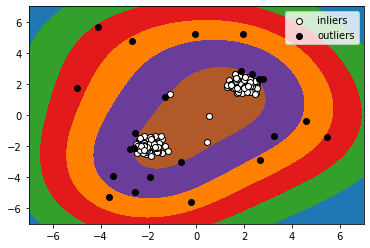

In [ ]:
# Afficher les points et les vecteurs les plus proches du plan de séparation
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)


# Choix du jeu de couleurs
plt.set_cmap(plt.cm.Paired)

# Trace le contour de la fonction de décision
plt.contourf(xx, yy, Z)

# Afficher les points considérés comme "inliers"
plt.scatter(X[y_pred > 0, 0], X[y_pred > 0, 1], c='white', edgecolors='k', label='inliers')

# Afficher les points considérés comme "outliers"
plt.scatter(X[y_pred <=0, 0], X[y_pred <= 0, 1], c='black', label='outliers')

plt.legend()
plt.show()

* **Question**  
Testez plusieurs valeurs pour le paramètres `gamma`. Pour quelle valeur le résultat semble meilleur (moins de *outliers* incorrectement classés) ? En pratique on ne connait pas les *outliers*, l'utilité des OCSVM est de les détecter.  
Le paramètre `nu` doit aussi avoir une bonne valeur pour ne pas sous-estimer (ou sur-estimer) le support de la distribution.  


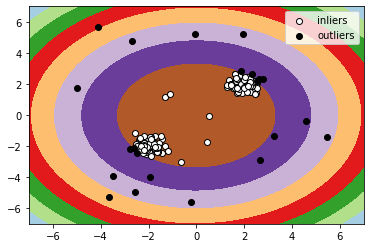

In [ ]:
# Construction du modèle (noyau RBF)
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.001)
clf.fit(X)

# Afficher les points et les vecteurs les plus proches du plan de séparation
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# Choix du jeu de couleurs
plt.set_cmap(plt.cm.Paired)
# Trace le contour de la fonction de décision
plt.contourf(xx, yy, Z)
# Affiche les points considérés comme "inliers"
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='inliers')
# Affiche les points considérés comme "outliers"
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()

* **Question**  
Remplacez le noyau `rbf`par un noyau linéaire. Quel problème constatez-vous ?

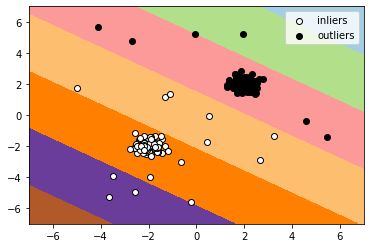

In [ ]:
# Construction du modèle (noyau RBF)
clf = svm.OneClassSVM(nu=0.1, kernel="linear", gamma=0.001)
clf.fit(X)

# Afficher les points et les vecteurs les plus proches du plan de séparation
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# Choix du jeu de couleurs
plt.set_cmap(plt.cm.Paired)
# Trace le contour de la fonction de décision
plt.contourf(xx, yy, Z)
# Affiche les points considérés comme "inliers"
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='inliers')
# Affiche les points considérés comme "outliers"
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()

On constate qu'une seul partie de la séparation. L'autre partie est invisible

#### **SVM pour la régression**  
Dans le cas de la régression, l'objectif est d'apprendre un modèle qui prédit les valeurs d'une fonction à partir des valeurs des variables d'entrée. L'idée est de trouver la fonction la plus "lisse" qui passe par les (ou à proximité des) données d'apprentissage. Scikit-learn implémente le modèle SVR (epsilon-regression) dans le module python 'sklearn.svm.SVR`. 
  
Dans cette partie nous présenterons la régression dans le cas inidimensionnel en comparant plusieurs noyaux avec scikit-learn. Le module `sklearn.svm.SVR` permet de faire varier tous les paramètres. 

Dans un premier temps, nous allons travailler sur des données générées. Notre objectif sera de reproduire une sinusoïde, comme dans le TP sur les arbres de décision:  

In [ ]:
X = np.sort(5*np.random.rand(40,1), axis = 0)
y = np.sin(X).ravel()

On ajoute un bruit aléatoire sur 20% des observations. Nos échantillons d'entraînement correspondent donc à la courbe suivante:  


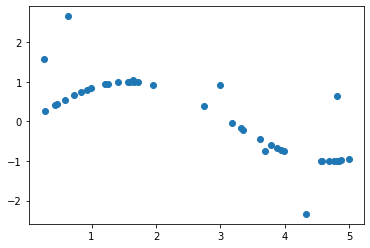

In [ ]:
y[::5] += 3*(0.5 - np.random.rand(8))

plt.scatter(X,y)
plt.show()

Nous pouvons facilement entrîner trois modèles de SVM pour la régression grâce à la classe `SVR` de scikit-learn:  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR

# Création des SVM

C=1e3
svr_rbf = SVR(kernel='rbf', C=C, gamma = 0.1)
svr_lin = SVR(kernel = 'linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree = 2)

# Entrainement des SVM sur les observations bruitées
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

Afficher les résultats:  

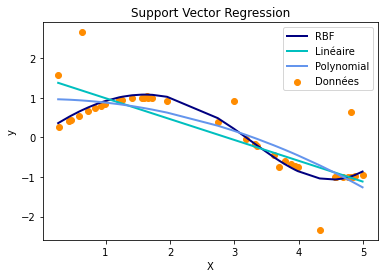

In [ ]:
plt.scatter(X, y, color='darkorange', label='Données')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF')
plt.plot(X, y_lin, color='c', lw=2, label='Linéaire')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

* **Question**  
Pourquoi employer une valeur aussi grande pour le parametre `C` (ici, `C = 1000`) ?  
  
C'est pour obtenir une meilleur lissage 

* **Diabetes dataset**  
`sklearn` contient plusieurs jeux de données réels d’exemple. Concentrons-nous sur le jeu de données Diabetes consistant à prévoir la progression de la maladie (représentée par un indice quantitatif) à partir de différentes variables : âge, sexe, pression artérielle, IMC et six valeurs de prélévements sanguins

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.30, random_state=0)

* **Question**  
Chargez la base de données Diabetes du module `sklearn.datasets` et faites une partition aléatoire en partie apprentissage et partie test (70% apprentissage, 30% test). Construisez un modèle de SVM de régression sur cette base et calculez l’erreur quadratique moyenne sur l’ensemble de test. Utilisez `GridSearchCV` pour déterminer le meilleur noyau à utiliser.

ValueError: ignored

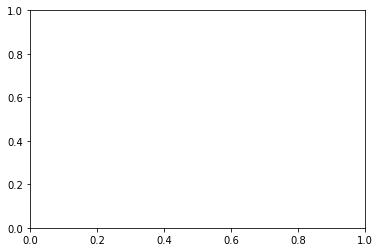

In [ ]:
C=1e3
svr_lin = SVR(kernel = 'linear', C=C)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)

plt.plot(X_train, y_lin, color='c', lw=2, label='Linéaire')
plt.xlabel('X_train')
plt.ylabel('y_lin')
plt.title('Support Vector Regression')
plt.legend()
plt.show()



### ***Réseaux de neurones***  
#### **Introduction**  
**Historique**  
  * Modélisation du *neurone formel*  
  * Concept mis en *réseau* avec une couche d'entrée et une sortie  
    * Origine du perceptron  
    * Approche connexioniste (atteint ses limites technologiques et théoriques au début des années 70)  
  * Relance de l'approche connexioniste au début des années 80 avec l'essor technologique et quelques avancées théoriques  
  * Estimation du *gradient* par rétro-propagation de l'erreur.  
  * Développement considérable (au début des années 90)  
  * Remis en veilleuse au milieu des années 90 au profit *d'autres algorithmes d'apprentissage*: boosting, support vector machine...  
  * Regain d'intérêt dans les années 2010, énorme battage médiatique sous l'appellation d*'apprentissage profond/deep learning*.  
  * Résultats spectaculaires obtenus par ces réseaux en reconnaissance d'images, traitement du langage naturel...


***Différentes architectures***  
Il existe différents types de réseaux neuronaux:  
* `perceptron multicouches`: les plus anciens et les plus simples; 
* `réseaux de convolution`: particulièrement efficaces pour le traitement d'images;  
* `réseaux récurrents`: adaptés à des données séquentielles (données textuelles, séries temporelles).  
  
DANS CETTE PARTIE: nous nous intéresserons uniquement au `perceptron multicouches`.  
  
***Définition: neurone biologique***  
Un neurone biologique est une cellule qui se caractérise par 
* des synapses: les points de connexion avec les autres neurones;  
* dentrites: entrées du neurones;  
* les axones ou sorties du neurone vers d'autres neurones;  
* le noyau qui active les sorties.  
  
***Définition:neurone formel***  
Un neurone formel est un modèle qui se caractérise par :  
* des entrées $x_1,...,x_p$;  
* des poids $w_0,...,w_p$ ;  
* une fonction d'activation $ \sigma : R --> R $;  
* une sortie: $ \hat y = \sigma (w_0 + w_1 x_1 +...+ w_px_p)$  
   


#### ***Le perceptron Simple***  
Le problème: expliquer une sortie $y \in R$ par des entrées $x=(x_1,...,x_p).$  

***Definition***  
Le percptron simple est une fonction $f$ des entrées $x$  
* pondérées par un vecteur $w=(w_1,...,w_p)$  
* complétées par un neurone de biais $w_0$,  
* et une fonction d'activation $ \sigma :R--> R$  
$ \hat y  = f(x) = \sigma (w_0+w_1x_1+...+w_px_p)$   
   
***Fonction d'activation***  
Plusieurs fonctions d'activation peuvent être utilisées:  
* *Identité*: $ \sigma (x) = x$  
* *sigmoïde* ou *logistique*: $\sigma (x) = \frac {1}{1-e^{-x}}$  
* *seuil*: $\sigma (x) = 1_{x \geq 0}$;  
* *ReLU* (Rectified Linear Unit): $\sigma(x) = max(x,0)$;  
* *Radiale*: $\sigma (x) = \sqrt {1/2 \pi} e^{- \frac {x^2}{2}}$  
  
**Remarque** 
Les poids $w_j$ sont estimés à partir des données


#### ***Perceptron multicouches***  
**Constat**  
* Régle de classification: le perceptron simple affecte un individu dans le groupe 1 si  
$P(Y=1|X=1) \geq 0.5 \Leftrightarrow w_0+w_1x_1+...+w_px_p \geq 0$  
* Il s'agit donc d'une régle linéaire.  
$ \Rightarrow$ peu efficace pour représenter des phénomènes "complexes".  
  
**Idée**  
Conserver cette structure de réseau en considérant plusieurs couches de plusieurs neurones.  
  
***Commentaires***  
* Les neurones de la premiére couche (cachée) calculent des combinaisons linéaires des entrées.  
* Ces combinaisons linéaires sont ensuite activées par une fonction d'activation, produisant une sortie par neurone.  
* Chaque neurone de la deuxième couche (cachée) est une combinaison linaire des sorties de la couche précédente...  
* activées par une fonction d'activation, produisant une sortie par neurone...  
  
**Remarque**  
Le nombre de neurones dans la couche finale est définie par la dimension de la sortie y:  
* Régression ou classification binaire $\Rightarrow$ 1 neurone.  
* Classification multiclasse ($K$) $\Rightarrow$ $K$ (ou $K$ -1) neurones.  


#### ***Estimation***  
* L'utilisateur doit choisir le nombre de couches, le nombre de neurones par couche, les fonctions d'activation de chaque neurone.  
* Une fois ces paramètres choisis, il faut calculer (estimer) tous les vecteurs de poids dans tous les neurones.  
  
**Approche**  
* On désigne par $\theta$ l'ensemble des paramètres à estimer $\Rightarrow f(x, \theta)$ la règle associée au réseau.  
* Minimisation de risque empirique: minimiser $$R_n (\theta) = \frac {1}{n} \sum_{i=1}^n l(y_i, f(x_i, \theta))$$  
où $l$ est une fonction de perte (classique).  
   
**Fonction de perte**  
* `Erreur quadratique` (régression):  
$$l(y, f(x)) = (y-f(x))^2$$.  
* `Cross-entropy` ou `log-vraisemblance négative` (classification binaire 0/1):  
$$l(y,p(x)) = -(ylog(p(x))+(1-y)log(1-p(x)))$$ où $p(x)=P(Y=1|X=x).$  
* `Cross-entropy` ou `log-vraisemblance négative` (classification multi-classes):  
$$l(y, p(x)) = - \sum_{k=1}^K 1_{y=k}log(p_k (x))$$  
où $p_k(x) = P(Y = k|X=x)$


***Descente de gradient***  
* La solution s'obtient à l'aide de methodes de type `descente de gradient`:  
$$\theta^{new} = \theta^{new} - \epsilon \nabla_{\theta} R_n (\theta^{old}$$.  
* Le réseau étant structuré en couches, la mise à jour des paramètres n'est pas directe.  
  
*Algorithme de rétropropagation*  
1. `Etape forward`: calculer tous les poids associés à $\theta^{old}$ et stocker toutes les valeurs intermédiaires.  
2. `Etape backward`:  
  2.1. Calculer le gradient dans la couche de sortie.  
  2.2 En déduire les gradients des couches cachées.  

***Batch et epoch***  
* L’algorithme de rétropropagation n’est généralement pas appliqué sur
l’ensemble des données, mais sur des sous-ensemble de cardinaux $m
$ appelés `batch`.  
* Cette approche est classique sur les gros volumes de données et
permet de prendre en compte des données séquentielles.  
* Pour prendre en compte toutes les données sur une étape de la
descente de gradient, on va donc appliquer n/m fois l’algorithme de
rétropropagation.  
* Une itération sur l’ensemble des données est appelée `epoch`.



***Algorithme de rétropropagation stochastique***  
**Algorithme**  
*Entrées*: $\epsilon$ (learning rate), $m$ (taille des batchs), $nb$ (nombre d'epochs).  
1. Pour $l=1$ à $nb$  
2. Partitionner aléatoire les données en $n/m$ batch de taille $m \Rightarrow B_1,...,B_{n/m}$.  
  2.1 Pour $j=1$ à $n/m$  
    2.1.1 Calculer les gradients sur le batch $j$ avec l'algorithme de rétropropagation: $\nabla_{\theta}$  
    2.1.2 Mettre à jour les paramètres  
    $$\theta^{new} = \theta^{old} - \epsilon \nabla_{\theta^{old}}$$  

Sorties: $\theta^{new}$ et $f(x, \theta^{new})$.  


***Choix des paramètres***  
* $\epsilon$ (pas de la descente de gradient), généralement petit. Existence de versions améliorées de l’algorithme précédent moins sensible à ce
paramètre (`RMSProp, Adam...`).  
* $m$ (taille des batch) : généralement petit (pas trop en fonction du temps de calcul). L’utilisateur peut (doit) faire plusieurs essais.  
* $nb$ (nombre d’epoch), proche du nombre d’itérations en boosting $\Rightarrow$ risque de surapprentissage si trop grand.  

EN PRATIQUE:  
Il est courant de visualiser l'évolution de la fonction de perte et/ou d'un critère de performance en fonction du nombre d'epoch.

***Nombre de couches et de neurones***  
* A choisir par l’utilisateur.  
* Il est généralement mieux d’en avoir trop que pas assez $\Rightarrow$ plus
"facile" de capter des non linéarités complexes avec beaucoup de couches et de neurones.  
* On fait généralement plusieurs essais que l’on compare (avec caret par exemple).  


####  ***Choix des paramètres et surapprentissage***  
***Surapprentissage***  
* Plusieurs paramètres peuvent causer du surapprentissage, notamment
les nombres de couches cachées, de neurones et d’epoch.  

**Plusieurs solutions**  
1. `Régularisation` de type rigde/lasso:  
$$R_n (\theta) = \frac {1}{n} \sum_{i=1}^n l((y_i, f(x_i, \theta))+ \lambda \Omega(\theta)$$.  
$\Rightarrow$ ajouter `kernel_regularizer=regularizer_l2(l=0.001) dans la fonction `layer_dense` par exemple.  
2. `Early stopping`: On stoppe l'algorithme lorsque l'ajout d'epoch n'améliore pas suffisamment un critère donné.  
3. `Dropout`: Suppression (aléatoire) de certains neurones dans les couches $\Rightarrow$ souvent la solution privilégiée.  
   
***Dropout***  
* A chaque étape de la phase d’entrainement, on supprime un nombre de
neurones (selon une Bernoulli de paramètre p).  
   




#### ***Conclusion***  
* Avantages :  
  * Méthode connue pour être efficace pour (quasiment) tous les
problèmes.  
  * Plus particulièrement sur des architectures particulières : images,
données textuelles.  

* Inconvénients :  
  * Gain plus discutable sur des problèmes standards.  
  * (Beaucoup) plus difficile à calibrer que les autres algorithmes ML.  
  * Niveau d’expertise important.

### ***Travaux Pratique: Deep Learning***  
Dans cette partie on va apprendre tout ce dont nous avons besoin pour commencer à créer nos propres réseaux de neurones profonds en utilisant les library de python `Keras et Tensorflow`.  
  




#### ***Un seul neurone***  
Le moyen le plus simple de créer un modèle dans Keras est d'utiliser `keras.Sequential`, qui crée un réseau de neurones sous la forme d'une pile de couches. Nous pouvons créer des modèles comme ceux ci-dessus en utilisant une couche dense (sur laquelle nous en apprendrons plus dans la prochaine leçon).  
  
Nous pourrions définir un modèle linéaire acceptant trois caractéristiques d'entrée ('sugars', 'fiber', and 'protein') et produire une seule sortie ('calories') 


In [1]:
from tensorflow import keras
from tensorflow.keras import layers  

# Create a network with 1 linear unit

model = keras.Sequential([layers.Dense(units = 1, input_shape=[3])])

Pour le premiére argument, `units`, on définie le nombre de sortie qu'on veut. Et dans notre cas, on veut juste prédire la valeur `calorie` donc `units=1`.  
Pour le second argument, `input_shape`, on donne à Keras les dimensions des entrées. Mettre `input_shape=[3]` assure que le model va accepté trois features comme entrée ('sugars', 'fibre'  and 'protein').  
   
Ce modèle est maintenant prêt à être adapté aux données d'entraînement

#### **Réseaux de neurones profonds**  
Dans cette partie, nous allons voir comment nous pouvons construire des réseaux de neurones capables d'apprendre les types complexes de relations pour lesquelles les réseaux de neurones profonds sont célèbres.  
  
Nous avons vu comment une unité linéaire calcule une fonction linéaire - nous allons maintenant voir comment combiner et modifier ces unités uniques pour modéliser des relations plus complexes.  
***  
"Sans fonctions d'activation, les réseaux de neurones ne peuvent apprendre que des relations linéaires. Afin d'ajuster les courbes, nous devrons utiliser des fonctions d'activation."  
Une fonction d'activation est simplement une fonction que nous appliquons à chacune des sorties d'une couche (ses activations).  
Le plus courant est la fonction redresseur( rectifier function) $max(0,x)$.  
La fonction de redressement a un graphique qui est une ligne avec la partie négative "rectifiée" à zéro. L'application de la fonction aux sorties d'un neurone mettra un coude dans les données, nous éloignant des lignes simples.   
Lorsque nous attachons le redresseur à une unité linéaire, nous obtenons une unité linéaire redressée ou ReLU (rectified linear unit). (Pour cette raison, il est courant d'appeler la fonction redresseur la «fonction ReLU».) L'application d'une activation ReLU à une unité linéaire signifie que la sortie devient $ max(0, w * x + b)$.  
  
***  
  
**Création de modèles séquentiels**  
Le modèle avec `Sequential` que nous allons utilisé connectera ensemble une liste de couches dans l'ordre du premier au dernier: la première couche reçoit l'entrée, la dernière couche produit la sortie 



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          # the hidden RelU layers
                          layers.Dense(units=4, activation='relu', input_shape=[2]),
                                       layers.Dense(units=3, activation='relu'),
                                       # the linear output layer
                                       layers.Dense(units=1)
])

Assurez-vous de passer toutes les couches ensemble dans une liste, comme [layer, layer, layer, ...], au lieu d'arguments séparés. Pour ajouter une fonction d'activation à une couche, il suffit de donner son nom dans l'argument d'activation.

Dans les parties précédentes, nous avons appris à créer des réseaux entièrement connectés à partir de piles de couches denses. Lors de leur création, toutes les pondérations du réseau sont définies aléatoirement - le réseau ne «sait» encore rien. Dans cette partie, nous allons voir comment former un réseau neuronal; nous allons voir comment les réseaux de neurones apprennent.  
  
Comme pour toutes les tâches d'apprentissage automatique, nous commençons par un ensemble de données d'entraînement. Chaque exemple dans les données d'entraînement se compose de certaines fonctionnalités (les entrées) ainsi que d'une cible attendue (la sortie). Former le réseau signifie ajuster ses poids de manière à ce qu'il puisse transformer les entités en cible.  
   
En plus des données d'entraînement, nous avons besoin de deux autres choses:  
* Une «fonction de perte» qui mesure la qualité des prévisions du réseau.  
* Un "optimiseur" qui peut indiquer au réseau comment modifier ses pondérations.  
  
La fonction de perte mesure la disparité entre la valeur réelle de la cible et la valeur que le modèle prédit.  
  
Nous avons décrit le problème que nous voulons que le réseau résolve, mais nous devons maintenant dire comment le résoudre. C'est le travail de l'optimiseur. L'optimiseur est un algorithme qui ajuste les poids pour minimiser la perte.

Pratiquement tous les algorithmes d'optimisation utilisés dans l'apprentissage profond appartiennent à une famille appelée descente de gradient stochastique. Ce sont des algorithmes itératifs qui entraînent un réseau par étapes. Une étape de la formation se déroule comme suit:  
* Échantillonnez des données d'entraînement et exécutez-les sur le réseau pour faire des prédictions    
* Mesurez la perte entre les prédictions et les vraies valeurs.  
* Enfin, ajustez les pondérations dans une direction qui réduit la perte.  

Ensuite, faites-le encore et encore jusqu'à ce que la perte soit aussi petite que vous le souhaitez (ou jusqu'à ce qu'elle ne diminue plus davantage).  
   
L'échantillon de données d'apprentissage de chaque itération est appelé un *minibatch* (ou souvent simplement un «*batch* (lot)»), tandis qu'un cycle complet des données d'apprentissage est appelé une époque. Le nombre d'époques pour lesquelles vous vous entraînez correspond au nombre de fois où le réseau verra chaque exemple de formation.  
  
**Ajouter la fonction perte et l'optimizer**   
Après avoir défini un modèle, vous pouvez ajouter une fonction de perte et un optimiseur avec la méthode de compilation du modèle:



In [2]:
model.compile(
    optimizer = "adam",
    loss = "mae")

**Exemple-Red Wine Quality**  
Nous savons maintenant tout ce dont nous avons besoin pour commencer à former des modèles d'apprentissage profond. Alors voyons-le en action! Nous utiliserons l'ensemble de données Red Wine Quality.

Cet ensemble de données comprend des mesures physiochimiques d'environ 1600 vins rouges portugais. Une note de qualité pour chaque vin est également incluse dans des tests de goût à l'aveugle. Dans quelle mesure pouvons-nous prédire la qualité perçue d'un vin à partir de ces mesures?

Nous avons mis toute la préparation des données dans cette prochaine cellule cachée. Ce n'est pas essentiel à ce qui suit, alors n'hésitez pas à l'ignorer. Une chose que vous pourriez noter pour l'instant est que nous avons redimensionné chaque fonctionnalité pour qu'elle se trouve dans l'intervalle
[0,1].  
Comme nous en discuterons plus dans la leçon 5, les réseaux de neurones ont tendance à mieux fonctionner lorsque leurs entrées sont à une échelle commune.

In [3]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/wine.csv')


# Create training and validation splits  
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,good
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,bad
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,good
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,good


In [4]:
df_train = df_train[["fixed acidity", "volatile acidity", "citric acid", 
                    "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
                    "density", "pH", "sulphates", "alcohol"]]
df_valid= df_valid[["fixed acidity", "volatile acidity", "citric acid", 
                    "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
                    "density", "pH", "sulphates", "alcohol"]]                  

In [5]:
# Scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
x_train = (df_train - min_) / (max_ - min_)
x_valid = (df_valid - min_) / (max_ - min_)

In [6]:
y_train = red_wine[["quality"]]
y_valid = red_wine[["quality"]]


In [7]:
y_train = y_train.replace("bad", 0)
y_train = y_train.replace("good", 1)

y_valid = y_valid.replace("bad", 0)
y_valid = y_valid.replace("good", 0)

Combien d'entrées ce réseau devrait-il avoir? Nous pouvons le découvrir en regardant le nombre de colonnes dans la matrice de données. Veillez à ne pas inclure la cible («qualité») ici - uniquement les fonctionnalités d'entrée.

In [8]:
print(x_train.shape)

(1119, 11)


In [21]:
yvalid = y_valid.loc[0:479, :]
print(yvalid.shape)

(480, 1)


In [22]:
ytrain = y_train.loc[0:1118, :]
print(ytrain.shape)

(1119, 1)


Onze colonnes signifie onze entrées.

Nous avons choisi un réseau à trois couches avec plus de 1500 neurones. Ce réseau doit être capable d'apprendre des relations assez complexes dans les données.

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(512, activation='relu', input_shape=[1])
, layers.Dense(512, activation='relu'),
layers.Dense(512, activation='relu'), 
layers.Dense(1)])

Le choix de l'architecture de votre modèle doit faire partie d'un processus. Commencez simplement et utilisez la perte de validation comme guide. Vous en apprendrez plus sur le développement de modèles dans les exercices.

Après avoir défini le modèle, nous compilons dans l'optimiseur et la fonction de perte.

In [25]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [30]:
print(x_valid.shape)
print(yvalid.shape)

print(x_train.shape)
print(ytrain.shape)

(480, 11)
(480, 1)
(1119, 11)
(1119, 1)


Nous sommes maintenant prêts à commencer la formation! Nous avons dit à Keras d'alimenter l'optimiseur 256 lignes de données d'entraînement à la fois (le batch_size) et de le faire 10 fois tout au long de l'ensemble de données (le epochs)

In [32]:
history = model.fit(
    x_train, ytrain,
    validation_data=(x_valid, yvalid),
    batch_size=256,
    epochs=10,
    )

Epoch 1/10


ValueError: ignored

You can see that Keras will keep you updated on the loss as the model trains.  
  
Often, a better way to view the loss though is to plot it . The `fit` method in fact keeps a record of the loss produced during training  in a `history` object. We will convert the data to a Pandas dataframe, which makes the plotting easy.  


In [33]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use pandas native plot method
history_df['loss'].plot();

NameError: ignored

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.  

#### ***Overfitting and Underfitting***  
   
Rappelez-vous de l'exemple de la leçon précédente que Keras conservera un historique de la perte de formation et de validation au cours des époques où il entraîne le modèle. Dans cette partie, nous allons apprendre à interpréter ces courbes d'apprentissage et à les utiliser pour guider le développement de modèles. En particulier, nous examinerons les courbes d'apprentissage à la recherche de preuves de sous-ajustement et de surajustement et examinerons quelques stratégies pour les corriger.

***Interprétation des courbes d'apprentissage***   
   
On va considérer les informations contenues dans les données d'entraînement comme étant de deux types: le signal et le bruit. Le signal est la partie qui généralise, la partie qui peut aider notre modèle à faire des prédictions à partir de nouvelles données. Le bruit est cette partie qui n'est vraie que pour les données d'apprentissage; le bruit est l'ensemble des fluctuations aléatoires qui proviennent des données du monde réel ou de tous les modèles accidentels et non informatifs qui ne peuvent pas réellement aider le modèle à faire des prédictions. Le bruit est la partie qui peut sembler utile mais ne l'est vraiment pas.  
  
Nous formons un modèle en choisissant des poids ou des paramètres qui minimisent la perte sur un ensemble d'apprentissage. Vous savez peut-être, cependant, que pour évaluer avec précision les performances d'un modèle, nous devons l'évaluer sur un nouvel ensemble de données, les données de validation.  
   
Lorsque nous entraînons un modèle, nous avons tracé la perte sur l'ensemble d'apprentissage d'époque par époque. À cela, nous ajouterons également un tracé des données de validation. Nous appelons ces graphiques les courbes d'apprentissage. Pour former efficacement des modèles d'apprentissage en profondeur, nous devons être capables de les interpréter.  
   
Désormais, la perte d'entraînement diminuera soit lorsque le modèle apprendra le signal, soit lorsqu'il apprendra du bruit. Mais la perte de validation ne diminuera que lorsque le modèle apprendra le signal. (Quel que soit le bruit que le modèle a appris de l'ensemble d'apprentissage ne se généralisera pas à de nouvelles données.) Ainsi, lorsqu'un modèle apprend un signal, les deux courbes descendent, mais lorsqu'il apprend du bruit, un espace est créé dans les courbes. La taille de l'écart vous indique la quantité de bruit que le modèle a appris.  
  
Idéalement, nous créerions des modèles qui apprendraient tout le signal et aucun bruit. Cela n'arrivera pratiquement jamais. Au lieu de cela, nous faisons un échange. Nous pouvons faire en sorte que le modèle apprenne plus de signal au prix d'apprendre plus de bruit. Tant que le commerce est en notre faveur, la perte de validation continuera à diminuer. Après un certain point, cependant, le commerce peut se retourner contre nous, le coût dépasse le bénéfice et la perte de validation commence à augmenter.  
   
Ce compromis indique qu'il peut y avoir deux problèmes qui peuvent survenir lors de la formation d'un modèle: pas assez de signal ou trop de bruit. Un sous-ajustement de l'ensemble d'apprentissage se produit lorsque la perte n'est pas aussi faible qu'elle pourrait l'être car le modèle n'a pas appris suffisamment de signal. Le surajustement de l'ensemble d'apprentissage se produit lorsque la perte n'est pas aussi faible qu'elle pourrait l'être parce que le modèle a appris trop de bruit. L'astuce pour former des modèles d'apprentissage profond est de trouver le meilleur équilibre entre les deux.


***Capacity***  
   
La capacité d'un modèle fait référence à la taille et à la complexité des modèles qu'il est capable d'apprendre. Pour les réseaux de neurones, cela sera largement déterminé par le nombre de neurones dont il dispose et la manière dont ils sont connectés entre eux. S'il apparaît que votre réseau est insuffisant pour les données, vous devriez essayer d'augmenter sa capacité   
   
Vous pouvez augmenter la capacité d'un réseau en l'élargissant (plus d'unités par rapport aux couches existantes) ou en l'approfondissant (en ajoutant plus de couches). Les réseaux plus larges ont plus de facilité à apprendre des relations plus linéaires, tandis que les réseaux plus profonds préfèrent les réseaux non linéaires. Ce qui est mieux dépend simplement de l'ensemble de données
   



In [34]:
model = keras.Sequential([layers.Dense(16, activation='relu'),
                          layers.Dense(1),])
wider = keras.Sequential([layers.Dense(32, activation='relu'),
                          layers.Dense(1),])
deeper = keras.Sequential([layers.Dense(16, activation='relu'),
                           layers.Dense(16, activation='relu'),
                           layers.Dense(1),])

***Early Stopping***  
   
Nous avons mentionné que lorsqu'un modèle apprend trop avec impatience le bruit, la perte de validation peut commencer à augmenter pendant l'entraînement. Pour éviter cela, nous pouvons simplement arrêter la formation chaque fois qu'il semble que la perte de validation ne diminue plus. Interrompre l'entraînement de cette manière est appelé arrêt prématuré (**early stopping.**).  
   
Une fois que nous détectons que la perte de validation recommence à augmenter, nous pouvons réinitialiser les poids à l'endroit où le minimum s'est produit. Cela garantit que le modèle ne continuera pas à apprendre le bruit et à suradapter les données.   
   
La formation avec arrêt prématuré signifie également que nous risquons moins d'arrêter la formation trop tôt, avant que le réseau n'ait fini d'apprendre le signal. Ainsi, en plus d'éviter le surajustement d'un entraînement trop long, un arrêt précoce peut également empêcher le sous-ajustement de ne pas s'entraîner assez longtemps. Réglez simplement vos époques d'entraînement sur un grand nombre (plus que ce dont vous aurez besoin), et l'arrêt prématuré s'occupera du reste.   
   
***Adding Early Stopping***  
   
Dans Keras, nous incluons l'arrêt anticipé dans notre formation via un rappel(**callback**). Un rappel est juste une fonction que vous voulez exécuter de temps en temps pendant que le réseau s'entraîne. Le rappel d'arrêt anticipé s'exécutera après chaque époque. (Keras a une variété de rappels utiles prédéfinis, mais vous pouvez également définir les vôtres.)
   


 

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience = 20, #how many epochs to wait before stopping
    restore_best_weights= True,
)

Ces paramètres disent: "S'il n'y a pas eu au moins une amélioration de 0,001 dans la perte de validation au cours des 20 époques précédentes, alors arrêtez la formation et conservez le meilleur modèle que vous avez trouvé." Il peut parfois être difficile de dire si la perte de validation augmente en raison d'un surajustement ou simplement en raison d'une variation aléatoire des lots. Les paramètres nous permettent de définir des tolérances autour du moment où s'arrêter.

***Exemple-Train a model with Early Stopping***

Minimum validation loss: 0.4694162607192993


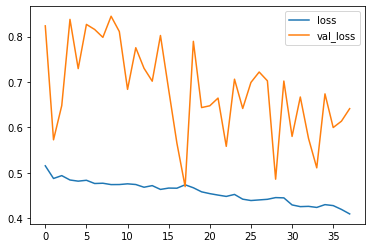

In [37]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)  

history = model.fit(
    x_train, ytrain,
    validation_data=(x_valid, yvalid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Et bien sûr, Keras a arrêté l'entraînement bien avant les 500 époques complètes!

#### ***Dropout and Batch Normalization***  
(Abandon et normalisation des lots)   
   
Il y a plus dans le monde de l'apprentissage profond que de simples couches denses. Il existe des dizaines de types de couches que vous pouvez ajouter à un modèle. (Essayez de parcourir la documentation Keras pour un échantillon!) Certains sont comme des couches denses et définissent des connexions entre les neurones, et d'autres peuvent faire du prétraitement ou des transformations d'autres sortes.  
   

Dans cette partie, nous allons découvrir deux types de couches spéciales, ne contenant pas de neurones eux-mêmes, mais qui ajoutent des fonctionnalités qui peuvent parfois bénéficier à un modèle de différentes manières. Les deux sont couramment utilisés dans les architectures modernes.   
   
***Dropout**  
   
Le premier d'entre eux est la "couche de suppression"(**dropout layer"**), qui peut aider à corriger le surajustement.

Dans la dernière leçon, nous avons parlé de la façon dont le surajustement est causé par l'apprentissage de modèles parasites du réseau dans les données d'apprentissage. Pour reconnaître ces fausses formes, un réseau s'appuiera souvent sur des combinaisons de poids très spécifiques, une sorte de «conspiration» de poids. Étant si spécifiques, ils ont tendance à être fragiles: supprimez-en un et la conspiration s'effondre.

C'est l'idée derrière le décrochage(**dropout**). Pour briser ces conspirations, nous supprimons au hasard une fraction des unités d'entrée d'une couche à chaque étape de la formation, ce qui rend beaucoup plus difficile pour le réseau d'apprendre ces faux modèles dans les données de formation. Au lieu de cela, il doit rechercher des modèles larges et généraux, dont les modèles de poids ont tendance à être plus robustes.  
   
Vous pouvez également considérer le décrochage comme la création d'une sorte d'ensemble de réseaux. Les prévisions ne seront plus faites par un grand réseau, mais plutôt par un comité de réseaux plus petits. Les membres du comité ont tendance à commettre différents types d'erreurs, mais ils ont raison en même temps, ce qui rend le comité dans son ensemble meilleur que quiconque. (Si vous connaissez les forêts aléatoires en tant qu'ensemble d'arbres de décision, c'est la même idée.)  
  
**Ajouter Dropout**  
Dans Keras, le taux `rate` d'argument du taux d'abandon (dropout) définit le pourcentage d'unités d'entrée à désactiver. Placez le layer `Dropout` juste avant le layer auquel vous souhaitez appliquer le dropout:
   

   

   



In [40]:
keras.Sequential([
                  #...  
                  layers.Dropout(rate=0.3),  # apply 30% dropout to the next layers
                  layers.Dense(16),  
                  #...
])

***Batch Normalization***  
La prochaine couche spéciale que nous examinerons effectue la "normalisation par lots" (ou "batchnorm"), ce qui peut aider à corriger un entraînement lent ou instable.  
   
Avec les réseaux de neurones, c'est généralement une bonne idée de mettre toutes vos données à une échelle commune, peut-être avec quelque chose comme `StandardScaler` ou `MinMaxScaler` de scikit-learn. La raison en est que SGD décalera les pondérations du réseau proportionnellement à l'ampleur de l'activation produite par les données. Les fonctionnalités(Features) qui ont tendance à produire des activations de tailles très différentes peuvent créer un comportement d'entraînement instable.  
   
Maintenant, s'il est bon de normaliser les données avant qu'elles n'entrent dans le réseau, peut-être que la normalisation à l'intérieur du réseau serait aussi meilleure! En fait, nous avons un type spécial de couche qui peut faire cela, la couche de normalisation par lots(**batch normalization layer**). Une couche de normalisation de lot examine chaque lot au fur et à mesure de son arrivée, en normalisant d'abord le lot avec sa propre moyenne et son écart type, puis en plaçant les données sur une nouvelle échelle avec deux paramètres de redimensionnement entraînables. Batchnorm, en effet, effectue une sorte de redimensionnement coordonné de ses entrées.  
   
Le plus souvent, batchnorm est ajouté pour aider au processus d'optimisation (bien qu'il puisse parfois également aider les performances de prédiction). Les modèles avec batchnorm ont tendance à nécessiter moins d'époques pour terminer la formation. De plus, batchnorm peut également résoudre divers problèmes qui peuvent provoquer le blocage de l'entraînement. Pensez à ajouter une normalisation par lots à vos modèles, surtout si vous rencontrez des problèmes pendant l'entraînement   
   
**Ajouter Batch Normalization**   
   
Il semble que la normalisation par lots puisse être utilisée à presque n'importe quel point d'un réseau. Vous pouvez le mettre après une couche
    



In [41]:
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

(<tensorflow.python.keras.layers.normalization_v2.BatchNormalization at 0x7f2539b2e790>,)

...ou entre une couche et sa fonction d'activation:

In [42]:
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

(<tensorflow.python.keras.layers.core.Activation at 0x7f253e111c50>,)

Et si vous l'ajoutez comme première couche de votre réseau, il peut agir comme une sorte de préprocesseur adaptatif, remplaçant quelque chose comme `StandardScaler` de Sci-Kit Learn.

***Example - Using Dropout and Batch Normalization***   


In [43]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

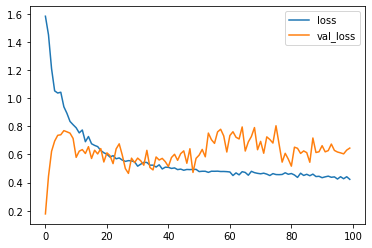

In [44]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    x_train, ytrain,
    validation_data=(x_valid, yvalid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Vous obtiendrez généralement de meilleures performances si vous standardisez vos données avant de les utiliser pour l'entraînement. Le fait que nous ayons pu utiliser les données brutes, cependant, montre à quel point la normalisation par lots peut être efficace sur des ensembles de données plus difficiles.

#### ***Classification binaire***  
Jusqu'à présent, dans ce cours, nous avons appris comment les réseaux de neurones peuvent résoudre les problèmes de régression. Nous allons maintenant appliquer les réseaux de neurones à un autre problème commun d'apprentissage automatique: la classification. La plupart de tout ce que nous avons appris jusqu'à présent s'applique toujours. La principale différence réside dans la fonction de perte que nous utilisons et dans le type de sorties que nous voulons que la couche finale produise.   
   
**Binary Classification**  
   
La classification dans l'une des deux classes est un problème courant d'apprentissage automatique. Vous voudrez peut-être prédire si un client est susceptible ou non d'effectuer un achat, si une transaction par carte de crédit était frauduleuse ou non, si les signaux de l'espace lointain montrent la preuve d'une nouvelle planète ou un test médical d'une maladie. Ce sont tous des problèmes de classification binaire.  
   
***Accuracy and Cross-Entropy***  
(Précision et entropie croisée)  
  
La précision est l'une des nombreuses mesures utilisées pour mesurer le succès d'un problème de classification. La précision est le rapport entre les prévisions correctes et les prévisions totales: exactitude = nombre_correct / total. Un modèle qui prédit toujours correctement aurait un score de précision de 1,0. Toutes choses étant égales par ailleurs, la précision est une métrique raisonnable à utiliser chaque fois que les classes de l'ensemble de données se produisent à peu près à la même fréquence.

Le problème de la précision (et de la plupart des autres métriques de classification) est qu'elle ne peut pas être utilisée comme une fonction de perte. SGD a besoin d'une fonction de perte qui change en douceur, mais la précision, étant un rapport de comptage, change en "sauts". Nous devons donc choisir un substitut pour agir en tant que fonction de perte. Ce substitut est la fonction d'entropie croisée.

Rappelons maintenant que la fonction de perte définit l'objectif du réseau lors de la formation. Avec la régression, notre objectif était de minimiser la distance entre le résultat attendu et le résultat prévu. Nous avons choisi MAE pour mesurer cette distance.  
   
Pour la classification, ce que nous voulons à la place, c'est une distance entre les probabilités, et c'est ce que fournit l'entropie croisée. L'entropie croisée est une sorte de mesure de la distance d'une distribution de probabilité à une autre.  
  
L'idée est que nous voulons que notre réseau prédise la classe correcte avec une probabilité de 1.0. Plus la probabilité prédite est éloignée de 1.0, plus la perte d'entropie croisée est grande.

Les raisons techniques pour lesquelles nous utilisons l'entropie croisée sont un peu subtiles, mais la principale chose à retenir de cette section est simplement ceci: utiliser l'entropie croisée pour une perte de classification; d'autres mesures qui pourraient vous intéresser (comme la précision) auront tendance à s'améliorer avec elle.   
   
***Faire des probabilités avec la fonction sigmoïde***   
   
Les fonctions d'entropie croisée et de précision nécessitent toutes deux des probabilités comme entrées, c'est-à-dire des nombres de 0 à 1. Pour convertir les sorties à valeur réelle produites par une couche dense en probabilités, nous attachons un nouveau type de fonction d'activation, l'activation sigmoïde.   
   
Pour obtenir la prédiction de classe finale, nous définissons une probabilité seuil. Typiquement, ce sera 0,5, de sorte que l'arrondi nous donnera la classe correcte: en dessous de 0,5 signifie la classe avec l'étiquette 0 et 0,5 ou plus signifie la classe avec l'étiquette 1. Un seuil de 0,5 est ce que Keras utilise par défaut avec sa métrique de précision.   
   
***Example - Binary Classification***  
Now let's try it out!   
   
L'ensemble de données Ionosphère contient des caractéristiques obtenues à partir de signaux radar focalisés sur la couche ionosphérique de l'atmosphère terrestre. La tâche consiste à déterminer si le signal montre la présence d'un objet ou simplement de l'air vide.



   

   




In [75]:
import pandas as pd
from IPython.display import display


ion = pd.read_csv('/content/ionosphere_data.csv')
ion = ion.replace(True, 1)
ion = ion.replace(False, 0)
ion = ion.replace("g", 0)
ion = ion.replace("b", 0)
display(ion.head())

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,column_m,column_n,column_o,column_p,column_q,column_r,column_s,column_t,column_u,column_v,column_w,column_x,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [78]:
ion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_a   351 non-null    float64
 1   column_b   351 non-null    float64
 2   column_c   351 non-null    float64
 3   column_d   351 non-null    float64
 4   column_e   351 non-null    float64
 5   column_f   351 non-null    float64
 6   column_g   351 non-null    float64
 7   column_h   351 non-null    float64
 8   column_i   351 non-null    float64
 9   column_j   351 non-null    float64
 10  column_k   351 non-null    float64
 11  column_l   351 non-null    float64
 12  column_m   351 non-null    float64
 13  column_n   351 non-null    float64
 14  column_o   351 non-null    float64
 15  column_p   351 non-null    float64
 16  column_q   351 non-null    float64
 17  column_r   351 non-null    float64
 18  column_s   351 non-null    float64
 19  column_t   351 non-null    float64
 20  column_u  

In [84]:
df = ion.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('column_ah', axis=1)
X_valid = df_valid.drop('column_ah', axis=1)
y_train = df_train['column_ah']
y_valid = df_valid['column_ah']






Nous définirons notre modèle comme nous l'avons fait pour les tâches de régression, à une exception près. Dans la dernière couche, incluez une activation «sigmoïde» afin que le modèle produise des probabilités de classe.

,column_a,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,column_m,column_n,column_o,column_p,column_q,column_r,column_s,column_t,column_u,column_v,column_w,column_x,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah
0,1.0,0.997695,0.470555,0.926215,0.511530,0.91699,0.31146,1.00000,0.51880,0.926215,0.411225,0.798775,0.275275,0.80268,0.308885,0.921780,0.307290,0.79106,0.339040,0.784855,0.35163,0.68473,0.263215,0.784055,0.244145,0.705390,0.26916,0.60633,0.32955,0.711335,0.227565,0.593205,0.273500
9,1.0,0.490680,0.457705,0.500000,0.500000,0.50000,0.50000,0.55735,0.36595,0.271685,0.309140,0.500000,0.500000,0.33172,0.693010,0.314335,0.575090,0.81864,0.610575,0.500000,0.50000,0.50000,0.500000,0.425985,0.493370,0.603225,0.48853,0.50000,0.50000,0.582975,0.620430,0.458960,0.690325
23,0.0,0.000000,1.000000,0.500000,0.500000,0.50000,0.50000,0.00000,1.00000,1.000000,1.000000,0.500000,0.500000,0.50000,0.500000,1.000000,0.000000,0.00000,1.000000,1.000000,1.00000,0.50000,0.500000,0.000000,0.000000,1.000000,0.00000,1.00000,1.00000,0.000000,1.000000,0.500000,0.500000
25,1.0,1.000000,0.789100,1.000000,0.000000,1.00000,0.00000,1.00000,0.00000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.18602,1.00000,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000,0.00000,1.000000,0.000000,1.000000,0.000000
28,1.0,1.000000,0.541900,1.000000,0.586935,1.00000,0.43346,0.99086,0.82260,1.000000,0.739520,1.000000,0.795565,1.00000,0.853790,1.000000,0.913885,1.00000,0.975495,1.000000,1.00000,0.99021,1.000000,0.958120,1.000000,0.919495,1.00000,0.87411,1.00000,0.821790,1.000000,0.762395,1.000000


In [88]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(4, activation='relu', input_shape=[32]),
                          layers.Dense(4, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])

Ajoutez la perte d'entropie croisée et la métrique de précision au modèle avec sa méthode de compilation. Pour les problèmes à deux classes, veillez à utiliser des versions «binaires». (Les problèmes avec plus de classes seront légèrement différents.) L'optimiseur Adam fonctionne également très bien pour la classification, nous allons donc nous en tenir à cela.

In [92]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

Le modèle dans ce problème particulier peut prendre plusieurs époques pour terminer la formation, nous allons donc inclure un rappel d'arrêt précoce pour plus de commodité.

In [93]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data= (X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0 )

Nous examinerons les courbes d'apprentissage comme toujours, et inspecterons également les meilleures valeurs pour la perte et la précision que nous avons obtenues sur l'ensemble de validation. (N'oubliez pas qu'un arrêt prématuré rétablira les pondérations à celles qui ont obtenu ces valeurs.)

Best Validation Loss: 0.6915
Best Validation Accuracy: 0.0571


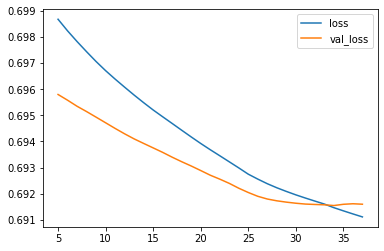

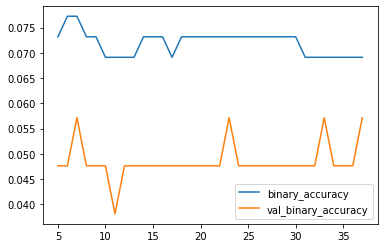

In [95]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))